In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import datasets
from self_supervised_tasks import *
from predictive_models import *
# from trainer import Trainer
from utils import (
    compute_interval_metrics,
    compute_deficet,
    compute_excess,
    process_results,
    write_to_file,
)

import logging
logging.getLogger().setLevel(logging.INFO)

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

/Users/nabeel/Documents/Projects/Noise/code/venv3.7/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/nabeel/Documents/Projects/Noise/code/venv3.7/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/d

# GET DATASET

In [2]:
dataset_name='star'
# load the dataset
X, y = datasets.GetDataset(dataset_name, "../datasets/")

alpha = 0.1
seed= 99
epochs = 500
batch_size = 128

# Preprocess data
(
    X_train_sc,
    X_residual_sc,
    X_cal_sc,
    X_test_sc,
    y_train_sc,
    y_residual_sc,
    y_cal_sc,
    y_test_sc,
) = datasets.process_data(X=X, y=y, seed=seed)

(1105, 39) (346, 39) (277, 39) (433, 39) (2161, 39)


# STEP 1: FIT PREDICTIVE MODEL 

In [3]:
pred_model = predictive_model(
            input_shape=X_train_sc.shape[1],
            epochs=epochs,
            batch_size=batch_size,
            seed=seed,
        )
pred_model.fit(X_train_sc, y_train_sc)

2023-02-14 22:18:38.569572: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
9/9 [==============================] - 1s 3ms/step - loss: 0.2375
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1573
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1219
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0999
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0932
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0846
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0673
Epoch 9/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0647
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0594
Epoch 11/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0606
Epoch 12/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 13/500
9/9 [==============================] - 0s 3ms/st

# STEP 2: FIT SSL MODEL ON EMBEDDING OF PREDICTIVE MODEL

## 2.1 AUTOENCODER

In [4]:
ssl_task = AutoEncoder(
            input_shape=pred_model.extract_encoding(X_train_sc).shape[1],
            reconstruct_shape=X_train_sc.shape[1],
            epochs=epochs,
            batch_size=batch_size,
            seed=seed,
        )
ssl_task.fit(x_train=X_train_sc, pred_model=pred_model)

Epoch 1/500
9/9 [==============================] - 1s 3ms/step - loss: 0.9939
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9705
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9379
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 0.8909
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 0.8314
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7732
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7240
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6849
Epoch 9/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6553
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6320
Epoch 11/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6123
Epoch 12/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5979
Epoch 13/500
9/9 [==============================] - 0s 3ms/st

# 2.2 VIME

In [5]:
vime = Vime_Task(epochs=epochs, seed=seed)
vime.fit(pred_model.extract_encoding(X_train_sc))

Epoch 1/500
9/9 [==============================] - 2s 3ms/step - loss: 1.1011 - mask_loss: 0.6761 - feature_loss: 0.2125
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 1.0159 - mask_loss: 0.6374 - feature_loss: 0.1893
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9170 - mask_loss: 0.5919 - feature_loss: 0.1625
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 0.8088 - mask_loss: 0.5417 - feature_loss: 0.1335
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7017 - mask_loss: 0.4910 - feature_loss: 0.1053
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6051 - mask_loss: 0.4443 - feature_loss: 0.0804
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5245 - mask_loss: 0.4045 - feature_loss: 0.0600
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4616 - mask_loss: 0.3727 - feature_loss: 0.0444
Epoch 9/500
9/9 [===============

# STEP 3: RUN VARIANTS ADAPTING WITH RESIDUALS

# 3.1 - General computations

In [6]:
from sklearn.ensemble import RandomForestRegressor

cfr_results_list = []
results = {}

ypred_cal=pred_model.predict(X_cal_sc).reshape(-1,1)
ypred_test=pred_model.predict(X_test_sc).reshape(-1,1)

N=len(y_cal_sc)

# compute main model errors
main_model_errors = ypred_test - y_test_sc

/Users/nabeel/Documents/Projects/Noise/code/venv3.7/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/Users/nabeel/Documents/Projects/Noise/code/venv3.7/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/

# 3.2: CFR

In [7]:
logging.info('Running conformalized residual fitting')
#calculate residuals
res_y=np.abs(y_residual_sc-pred_model.predict(X_residual_sc).reshape(-1,1))
res_y += 0.00001 
res_y = np.log(res_y)

# fit residual model
model_r = predictive_model(
    input_shape= X_residual_sc.shape[1],
    epochs=epochs,
    batch_size=batch_size,
)
model_r.fit(X_residual_sc,res_y)

#calculate q_yhat for the calibration set
res_ypred_cal=model_r.predict(X_cal_sc).reshape(-1,1)
res_ypred_cal = np.exp(res_ypred_cal)
q_yhat=np.quantile(np.abs(y_cal_sc-ypred_cal)/res_ypred_cal,np.ceil((N+1)*(1-alpha))/N)

cfr_qyhat = q_yhat

#predict with 1-alpha confidence - scaled by residual predictions
res_ypred_test=model_r.predict(X_test_sc).reshape(-1,1)
res_ypred_test= np.exp(res_ypred_test)
lower_bound=ypred_test-(q_yhat*res_ypred_test.reshape(-1,1))
upper_bound=ypred_test+(q_yhat*res_ypred_test.reshape(-1,1))

cfr_residual_model_errors =res_ypred_test

cfr_upper = upper_bound
cfr_lower = lower_bound

_, avg_length = compute_interval_metrics(lower_bound,upper_bound,y_test_sc)
avg_excess, proportion_excess = compute_excess(lower_bound,upper_bound,y_test_sc)
avg_deficet, proportion_deficet = compute_deficet(lower_bound,upper_bound,y_test_sc)

results['CFR'] = {'avg_length': avg_length, 
                'avg_excess': avg_excess, 
                'avg_deficet': avg_deficet, 
                }

INFO:root:Running conformalized residual fitting


Epoch 1/500
3/3 [==============================] - 1s 3ms/step - loss: 14.3509
Epoch 2/500
3/3 [==============================] - 0s 4ms/step - loss: 12.7712
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 11.4004
Epoch 4/500
3/3 [==============================] - 0s 4ms/step - loss: 10.2521
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 8.8689
Epoch 6/500
3/3 [==============================] - 0s 4ms/step - loss: 7.7332
Epoch 7/500
3/3 [==============================] - 0s 4ms/step - loss: 6.6257
Epoch 8/500
3/3 [==============================] - 0s 3ms/step - loss: 5.6480
Epoch 9/500
3/3 [==============================] - 0s 4ms/step - loss: 4.6679
Epoch 10/500
3/3 [==============================] - 0s 4ms/step - loss: 4.0932
Epoch 11/500
3/3 [==============================] - 0s 4ms/step - loss: 3.4065
Epoch 12/500
3/3 [==============================] - 0s 5ms/step - loss: 2.8831
Epoch 13/500
3/3 [==============================] - 0s 4m

# 3.3 CFR + AE

In [8]:

logging.info('AE SSL Running SSL conformalized residual fitting')

#fit a new model to predict residuals - augmented with SSL task 
ssl_train_ae = ssl_task.predict(X_train_sc).reshape(-1,1)
ssl_residual_ae = ssl_task.predict(X_residual_sc).reshape(-1,1)
ssl_cal_ae = ssl_task.predict(X_cal_sc).reshape(-1,1)
ssl_test_ae = ssl_task.predict(X_test_sc).reshape(-1,1)

scaler_ssl = StandardScaler()
scaler_ssl.fit(ssl_train_ae)

ssl_train_sc_ae = scaler_ssl.transform(ssl_train_ae)
ssl_residual_sc_ae = scaler_ssl.transform(ssl_residual_ae)
ssl_cal_sc_ae= scaler_ssl.transform(ssl_cal_ae)
ssl_test_sc_ae = scaler_ssl.transform(ssl_test_ae)

res_y=np.abs(y_residual_sc-pred_model.predict(X_residual_sc).reshape(-1,1))
X_train_r  = np.hstack([X_residual_sc, ssl_residual_sc_ae])

# fit residual model
model_r = predictive_model(
    input_shape= X_train_r.shape[1],
    epochs=epochs,
    batch_size=batch_size,
)
model_r.fit(X_train_r,res_y)


#calculate q_yhat for the calibration set
X_cal_r  = np.hstack([X_cal_sc, ssl_cal_sc_ae])
res_ypred_cal=model_r.predict(X_cal_r).reshape(-1,1)
q_yhat=np.quantile(np.abs(y_cal_sc-ypred_cal)/res_ypred_cal,np.ceil((N+1)*(1-alpha))/N)

#predict with 1-alpha confidence - scaled by residual predictions
X_test_r  = np.hstack([X_test_sc, ssl_test_sc_ae])
res_ypred_test=model_r.predict(X_test_r).reshape(-1,1)
lower_bound=ypred_test-(q_yhat*res_ypred_test.reshape(-1,1))
upper_bound=ypred_test+(q_yhat*res_ypred_test.reshape(-1,1))

ae_residual_model_errors =res_ypred_test

ae_upper = upper_bound
ae_lower = lower_bound

_, avg_length = compute_interval_metrics(lower_bound,upper_bound,y_test_sc)
avg_excess, proportion_excess = compute_excess(lower_bound,upper_bound,y_test_sc)
avg_deficet, proportion_deficet = compute_deficet(lower_bound,upper_bound,y_test_sc)


results['CFR+AE'] = {'avg_length': avg_length, 
                    'avg_excess': avg_excess, 
                    'avg_deficet': avg_deficet, 
                    }

INFO:root:AE SSL Running SSL conformalized residual fitting


Epoch 1/500
3/3 [==============================] - 1s 4ms/step - loss: 0.1208
Epoch 2/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 4/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0606
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0417
Epoch 6/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0407
Epoch 7/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0381
Epoch 9/500
3/3 [==============================] - 0s 32ms/step - loss: 0.0356
Epoch 10/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0308
Epoch 11/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0326
Epoch 12/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0251
Epoch 13/500
3/3 [==============================] - 0s 5ms/s

# 3.4: CFR + VIME

In [9]:
logging.info('VIME SSL Running SSL conformalized residual fitting')

#fit a new model to predict residuals - augmented with SSL task 
ssl_train_vime = vime.predict(pred_model.extract_encoding(X_train_sc)).reshape(-1,1)
ssl_residual_vime = vime.predict(pred_model.extract_encoding(X_residual_sc)).reshape(-1,1)
ssl_cal_vime = vime.predict(pred_model.extract_encoding(X_cal_sc)).reshape(-1,1)
ssl_test_vime = vime.predict(pred_model.extract_encoding(X_test_sc)).reshape(-1,1)

scaler_ssl = StandardScaler()
scaler_ssl.fit(ssl_train_vime)

ssl_train_sc_vime = scaler_ssl.transform(ssl_train_vime)
ssl_residual_sc_vime = scaler_ssl.transform(ssl_residual_vime)
ssl_cal_sc_vime = scaler_ssl.transform(ssl_cal_vime)
ssl_test_sc_vime = scaler_ssl.transform(ssl_test_vime)

res_y=np.abs(y_residual_sc-pred_model.predict(X_residual_sc).reshape(-1,1))

X_train_r  = np.hstack([X_residual_sc, ssl_residual_sc_vime])

# fit residual model
model_r = predictive_model(
    input_shape= X_train_r.shape[1],
    epochs=epochs,
    batch_size=batch_size,
)
model_r.fit(X_train_r,res_y)


#calculate q_yhat for the calibration set
X_cal_r  = np.hstack([X_cal_sc, ssl_cal_sc_vime])
res_ypred_cal=model_r.predict(X_cal_r).reshape(-1,1)
q_yhat=np.quantile(np.abs(y_cal_sc-ypred_cal)/res_ypred_cal,np.ceil((N+1)*(1-alpha))/N)

vime_qyhat = q_yhat

#predict with 1-alpha confidence - scaled by residual predictions
X_test_r  = np.hstack([X_test_sc, ssl_test_sc_vime])
res_ypred_test=model_r.predict(X_test_r).reshape(-1,1)
lower_bound=ypred_test-(q_yhat*res_ypred_test.reshape(-1,1))
upper_bound=ypred_test+(q_yhat*res_ypred_test.reshape(-1,1))

vime_residual_model_errors =res_ypred_test

vime_upper = upper_bound
vime_lower = lower_bound

_, avg_length = compute_interval_metrics(lower_bound,upper_bound,y_test_sc)
avg_excess, proportion_excess = compute_excess(lower_bound,upper_bound,y_test_sc)
avg_deficet, proportion_deficet = compute_deficet(lower_bound,upper_bound,y_test_sc)


results['CFR+VIME'] = {'avg_length': avg_length, 
                    'avg_excess': avg_excess, 
                    'avg_deficet': avg_deficet,
                     }

INFO:root:VIME SSL Running SSL conformalized residual fitting


Epoch 1/500
3/3 [==============================] - 1s 4ms/step - loss: 0.0813
Epoch 2/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0632
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0505
Epoch 4/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0433
Epoch 5/500
3/3 [==============================] - 0s 6ms/step - loss: 0.0285
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 0.0306
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 0.0270
Epoch 8/500
3/3 [==============================] - 0s 6ms/step - loss: 0.0268
Epoch 9/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0248
Epoch 10/500
3/3 [==============================] - 0s 6ms/step - loss: 0.0238
Epoch 11/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0190
Epoch 12/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0183
Epoch 13/500
3/3 [==============================] - 0s 6ms/st

# ANALYZE

In [10]:
cfr_results_list.append(results)
cfr_results_list


[{'CFR': {'avg_length': 0.48275307,
   'avg_excess': 0.21020193,
   'avg_deficet': 0.034475572},
  'CFR+AE': {'avg_length': 0.2671316,
   'avg_excess': 0.09405795,
   'avg_deficet': 0.036606263},
  'CFR+VIME': {'avg_length': 0.24844335,
   'avg_excess': 0.08745485,
   'avg_deficet': 0.033236768}}]

In [11]:
for i in range(0,450, 100):
    cfr_intervals = (cfr_upper-cfr_lower).reshape(-1)

    ids = np.argsort(cfr_intervals)[i:i+100]

    vime_intervals = (vime_upper-vime_lower).reshape(-1)

    print(np.mean(vime_intervals[ids]), np.mean(cfr_intervals[ids]), np.mean(vime_residual_model_errors[ids]), np.mean(np.abs(ypred_test - y_test_sc)[ids]))
    print(np.mean(vime_intervals[ids])-np.mean(cfr_intervals[ids]))
    print(f"Corr VIME to error = {np.corrcoef((ypred_test - y_test_sc).reshape(-1)[ids], ssl_test_vime.reshape(-1)[ids])[0,1]}")
    print(f"Corr AE to error = {np.corrcoef((ypred_test - y_test_sc).reshape(-1)[ids], ssl_test_ae.reshape(-1)[ids])[0,1]}")

0.22628494 0.1356324 0.037932955 0.04876299
0.09065254
Corr VIME to error = 0.5022760239831212
Corr AE to error = -0.08322768277271993
0.24236572 0.31299862 0.040628638 0.04713786
-0.070632905
Corr VIME to error = 0.205900259614497
Corr AE to error = 0.012611752829071688
0.24955484 0.47990972 0.041833777 0.052291967
-0.23035488
Corr VIME to error = 0.11256220349060773
Corr AE to error = 0.07908179633215427
0.2586255 0.7332991 0.043354325 0.04815665
-0.47467357
Corr VIME to error = 0.4505296204878474
Corr AE to error = 0.1590465336346306
0.28745607 1.2984272 0.048187293 0.04389891
-1.0109712
Corr VIME to error = 0.3463973441419215
Corr AE to error = 0.37502885877977743


# Compute PCA to visualize

In [12]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

cfr_intervals = (cfr_upper-cfr_lower).reshape(-1)
vime_intervals = (vime_upper-vime_lower).reshape(-1)
ids = np.argsort(cfr_intervals)

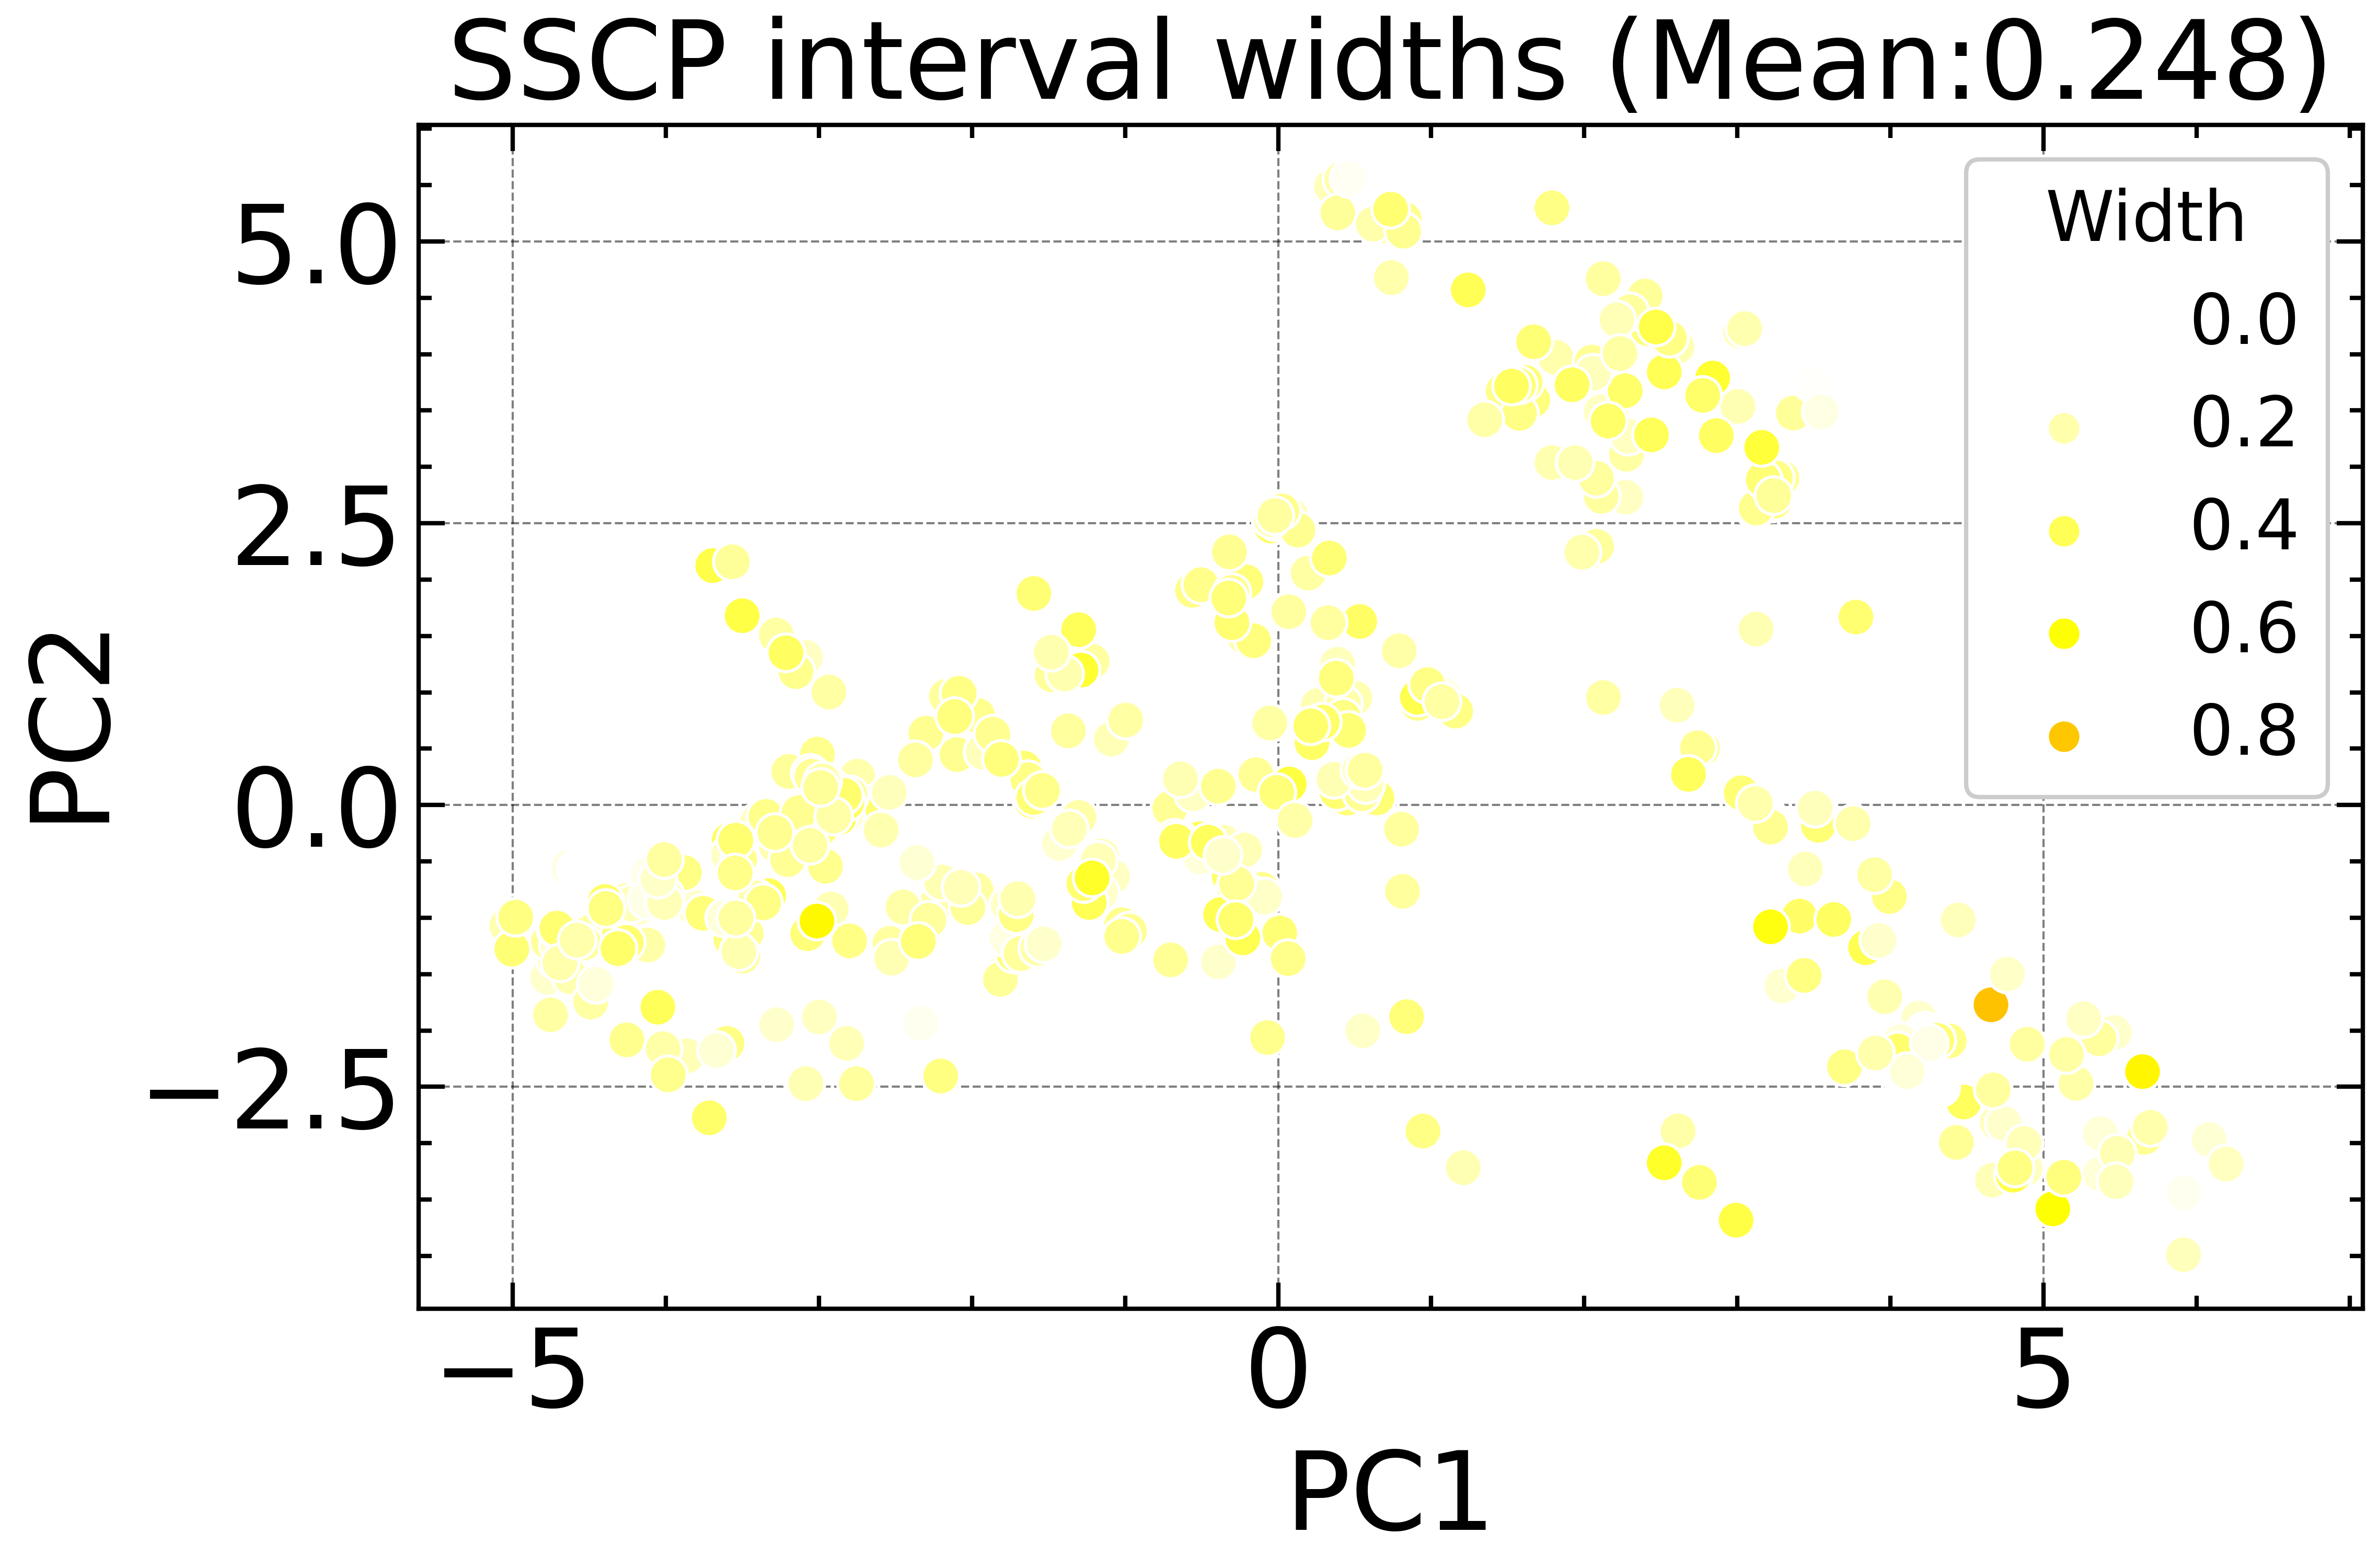

In [13]:

plt.style.reload_library()
plt.style.use(["science", "ieee", "no-latex", "notebook", "grid", "vibrant"])

FONT=25
plt.rc("font", size=FONT)  # controls default text sizes
# plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=16)  # legend fontsize
plt.rc("figure", titlesize=FONT)  # fontsize of the figure title

plt.figure(figsize=(8,5))
maximum = np.max(cfr_intervals)
width = str(np.round(np.mean(vime_intervals[ids]),3))
sns.scatterplot(X_test_pca[ids,0],X_test_pca[ids,1],hue=vime_intervals.reshape(-1)[ids], hue_norm=(0,maximum), palette=matplotlib.cm.hot.reversed(), s=75)
plt.legend(title='Width')
plt.title(f'SSCP interval widths (Mean:{width})',fontdict = {'fontsize' : FONT})
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('../figures/insight_vime.pdf')

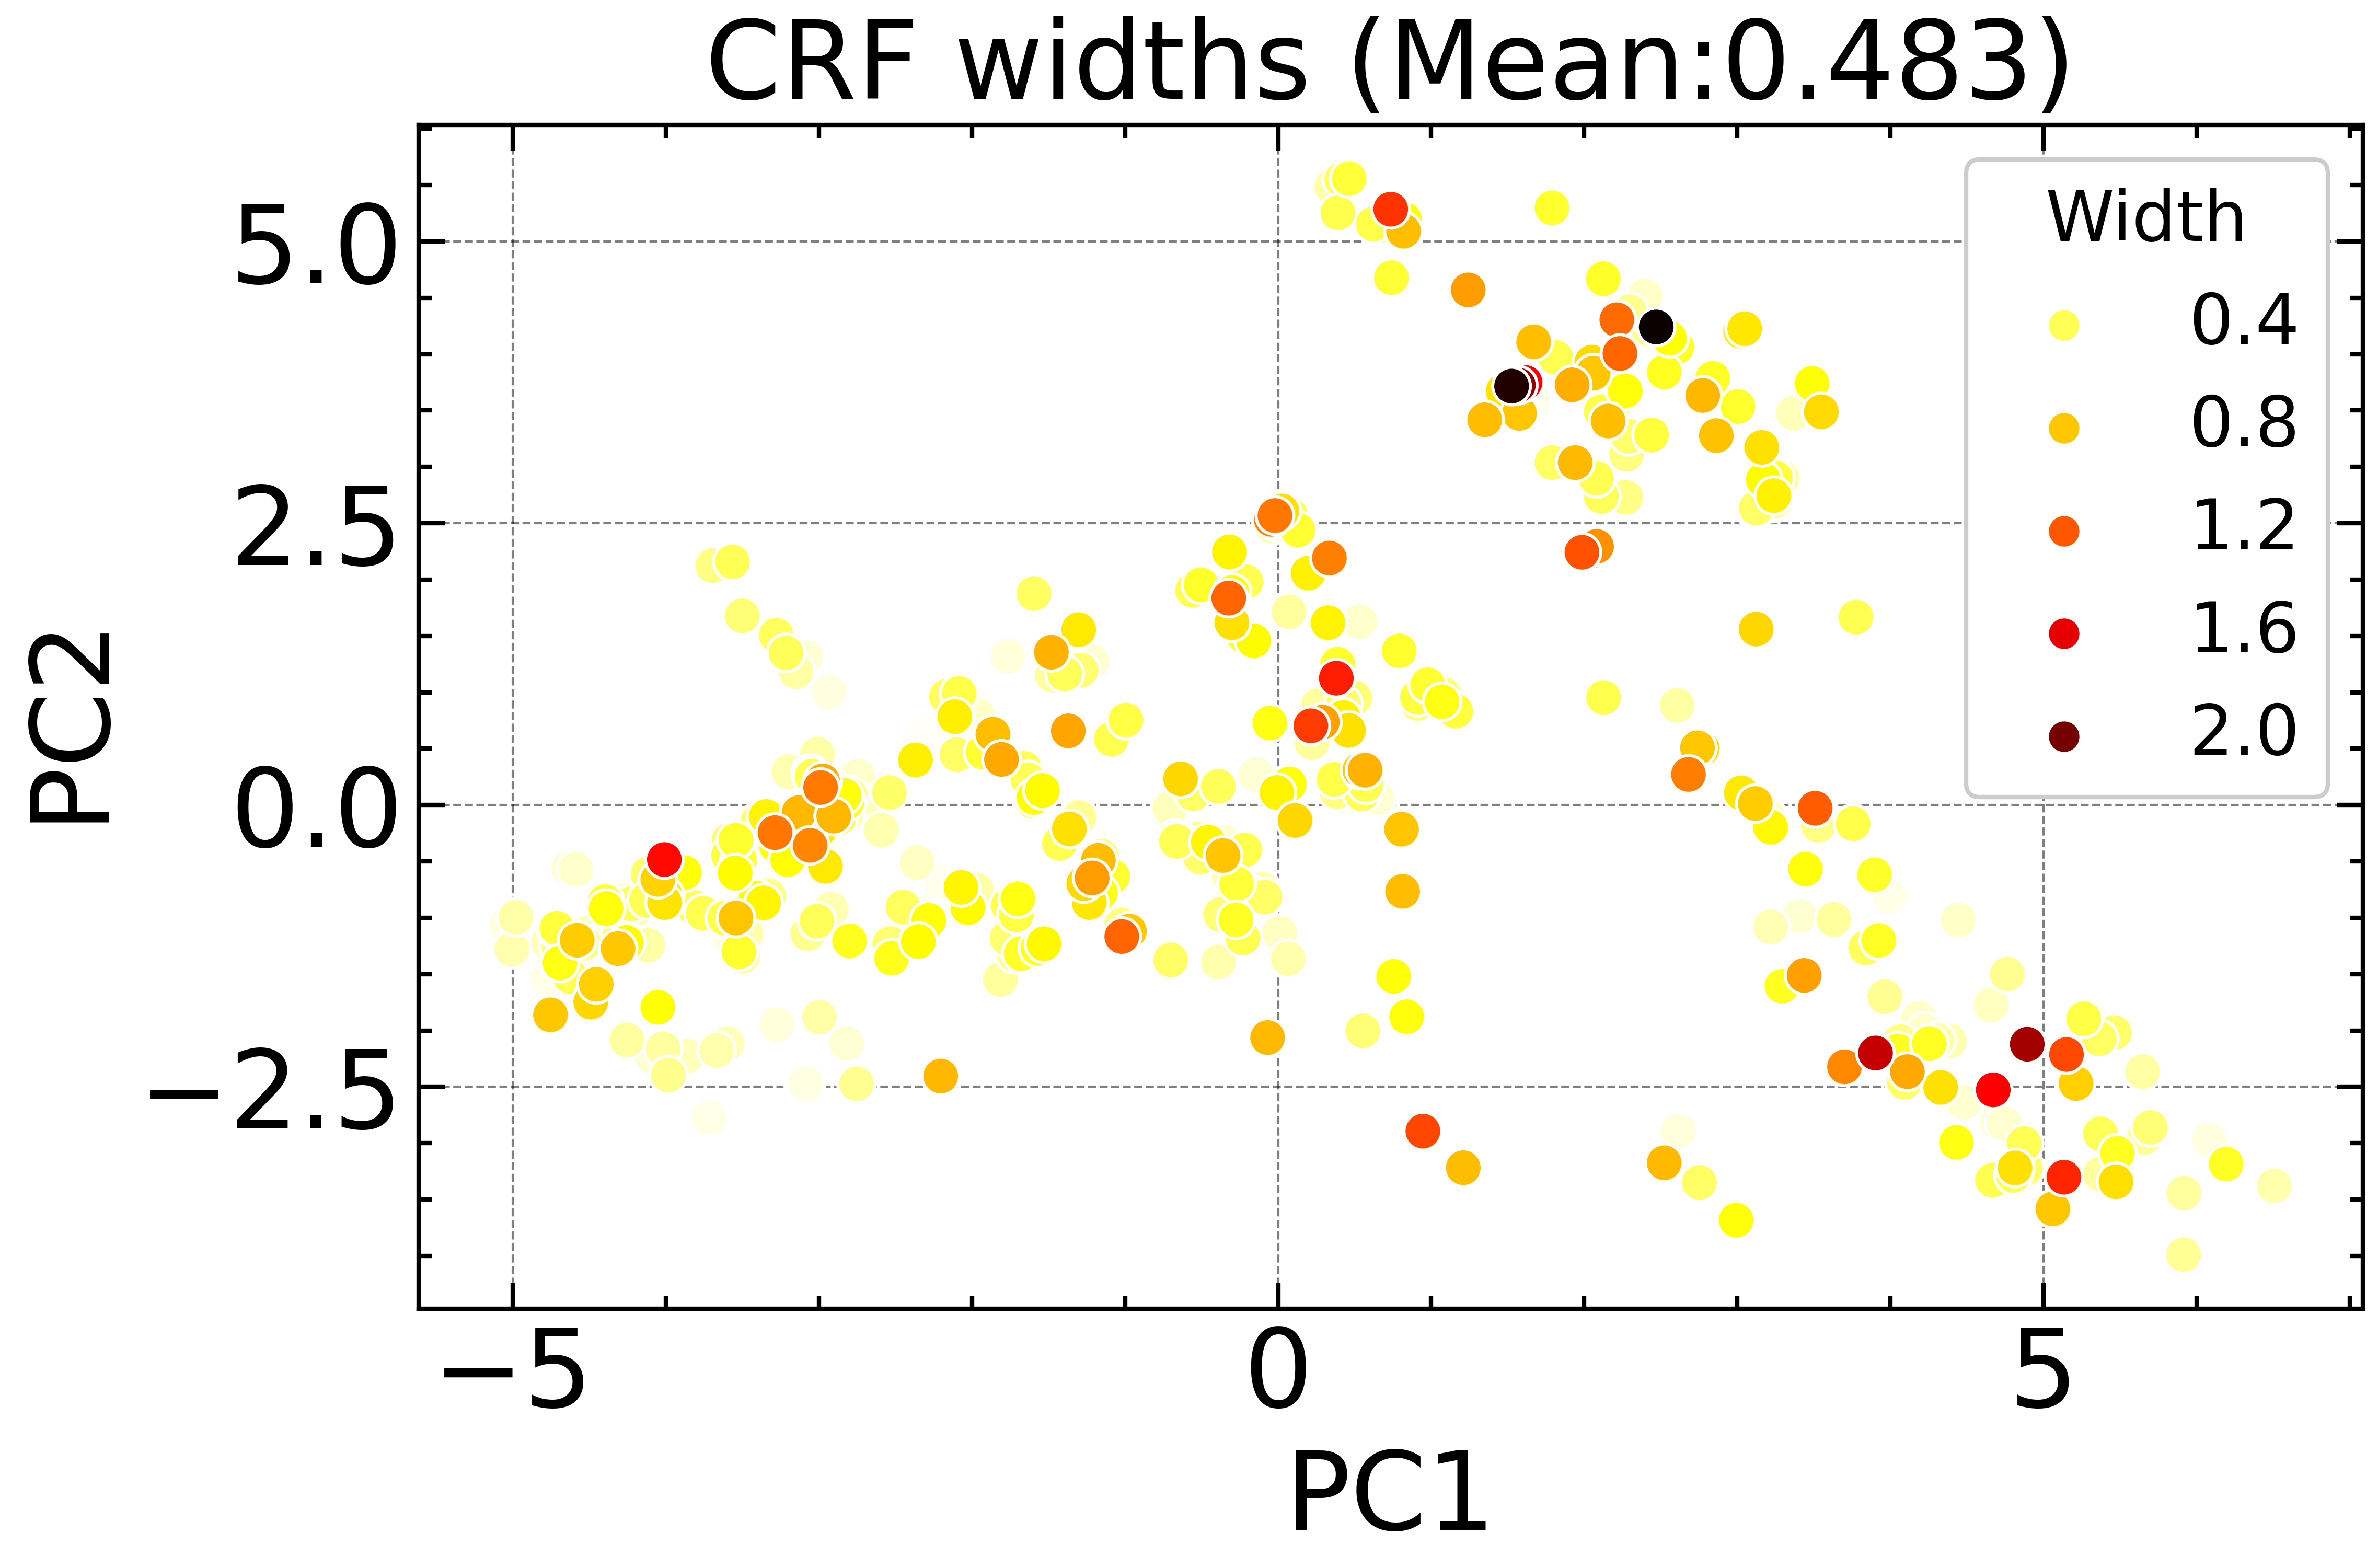

In [14]:
data = cfr_intervals.reshape(-1)
plt.figure(figsize=(8,5))
width = str(np.round(np.mean(cfr_intervals[ids]),3))
#sns.scatterplot(X_test_pca[ids,0],X_test_pca[ids,1],hue=digitized, palette=matplotlib.cm.autumn.reversed())matplotlib.cm.autumn.reversed()
sns.scatterplot(X_test_pca[ids,0],X_test_pca[ids,1],hue=cfr_intervals.reshape(-1)[ids], hue_norm=(0,maximum), palette=matplotlib.cm.hot.reversed(), s=75)
plt.legend(title='Width')
plt.title(f'CRF widths (Mean:{width})',fontdict = {'fontsize' : FONT})
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('../figures/insight_crf.pdf')

Text(0, 0.5, 'y')

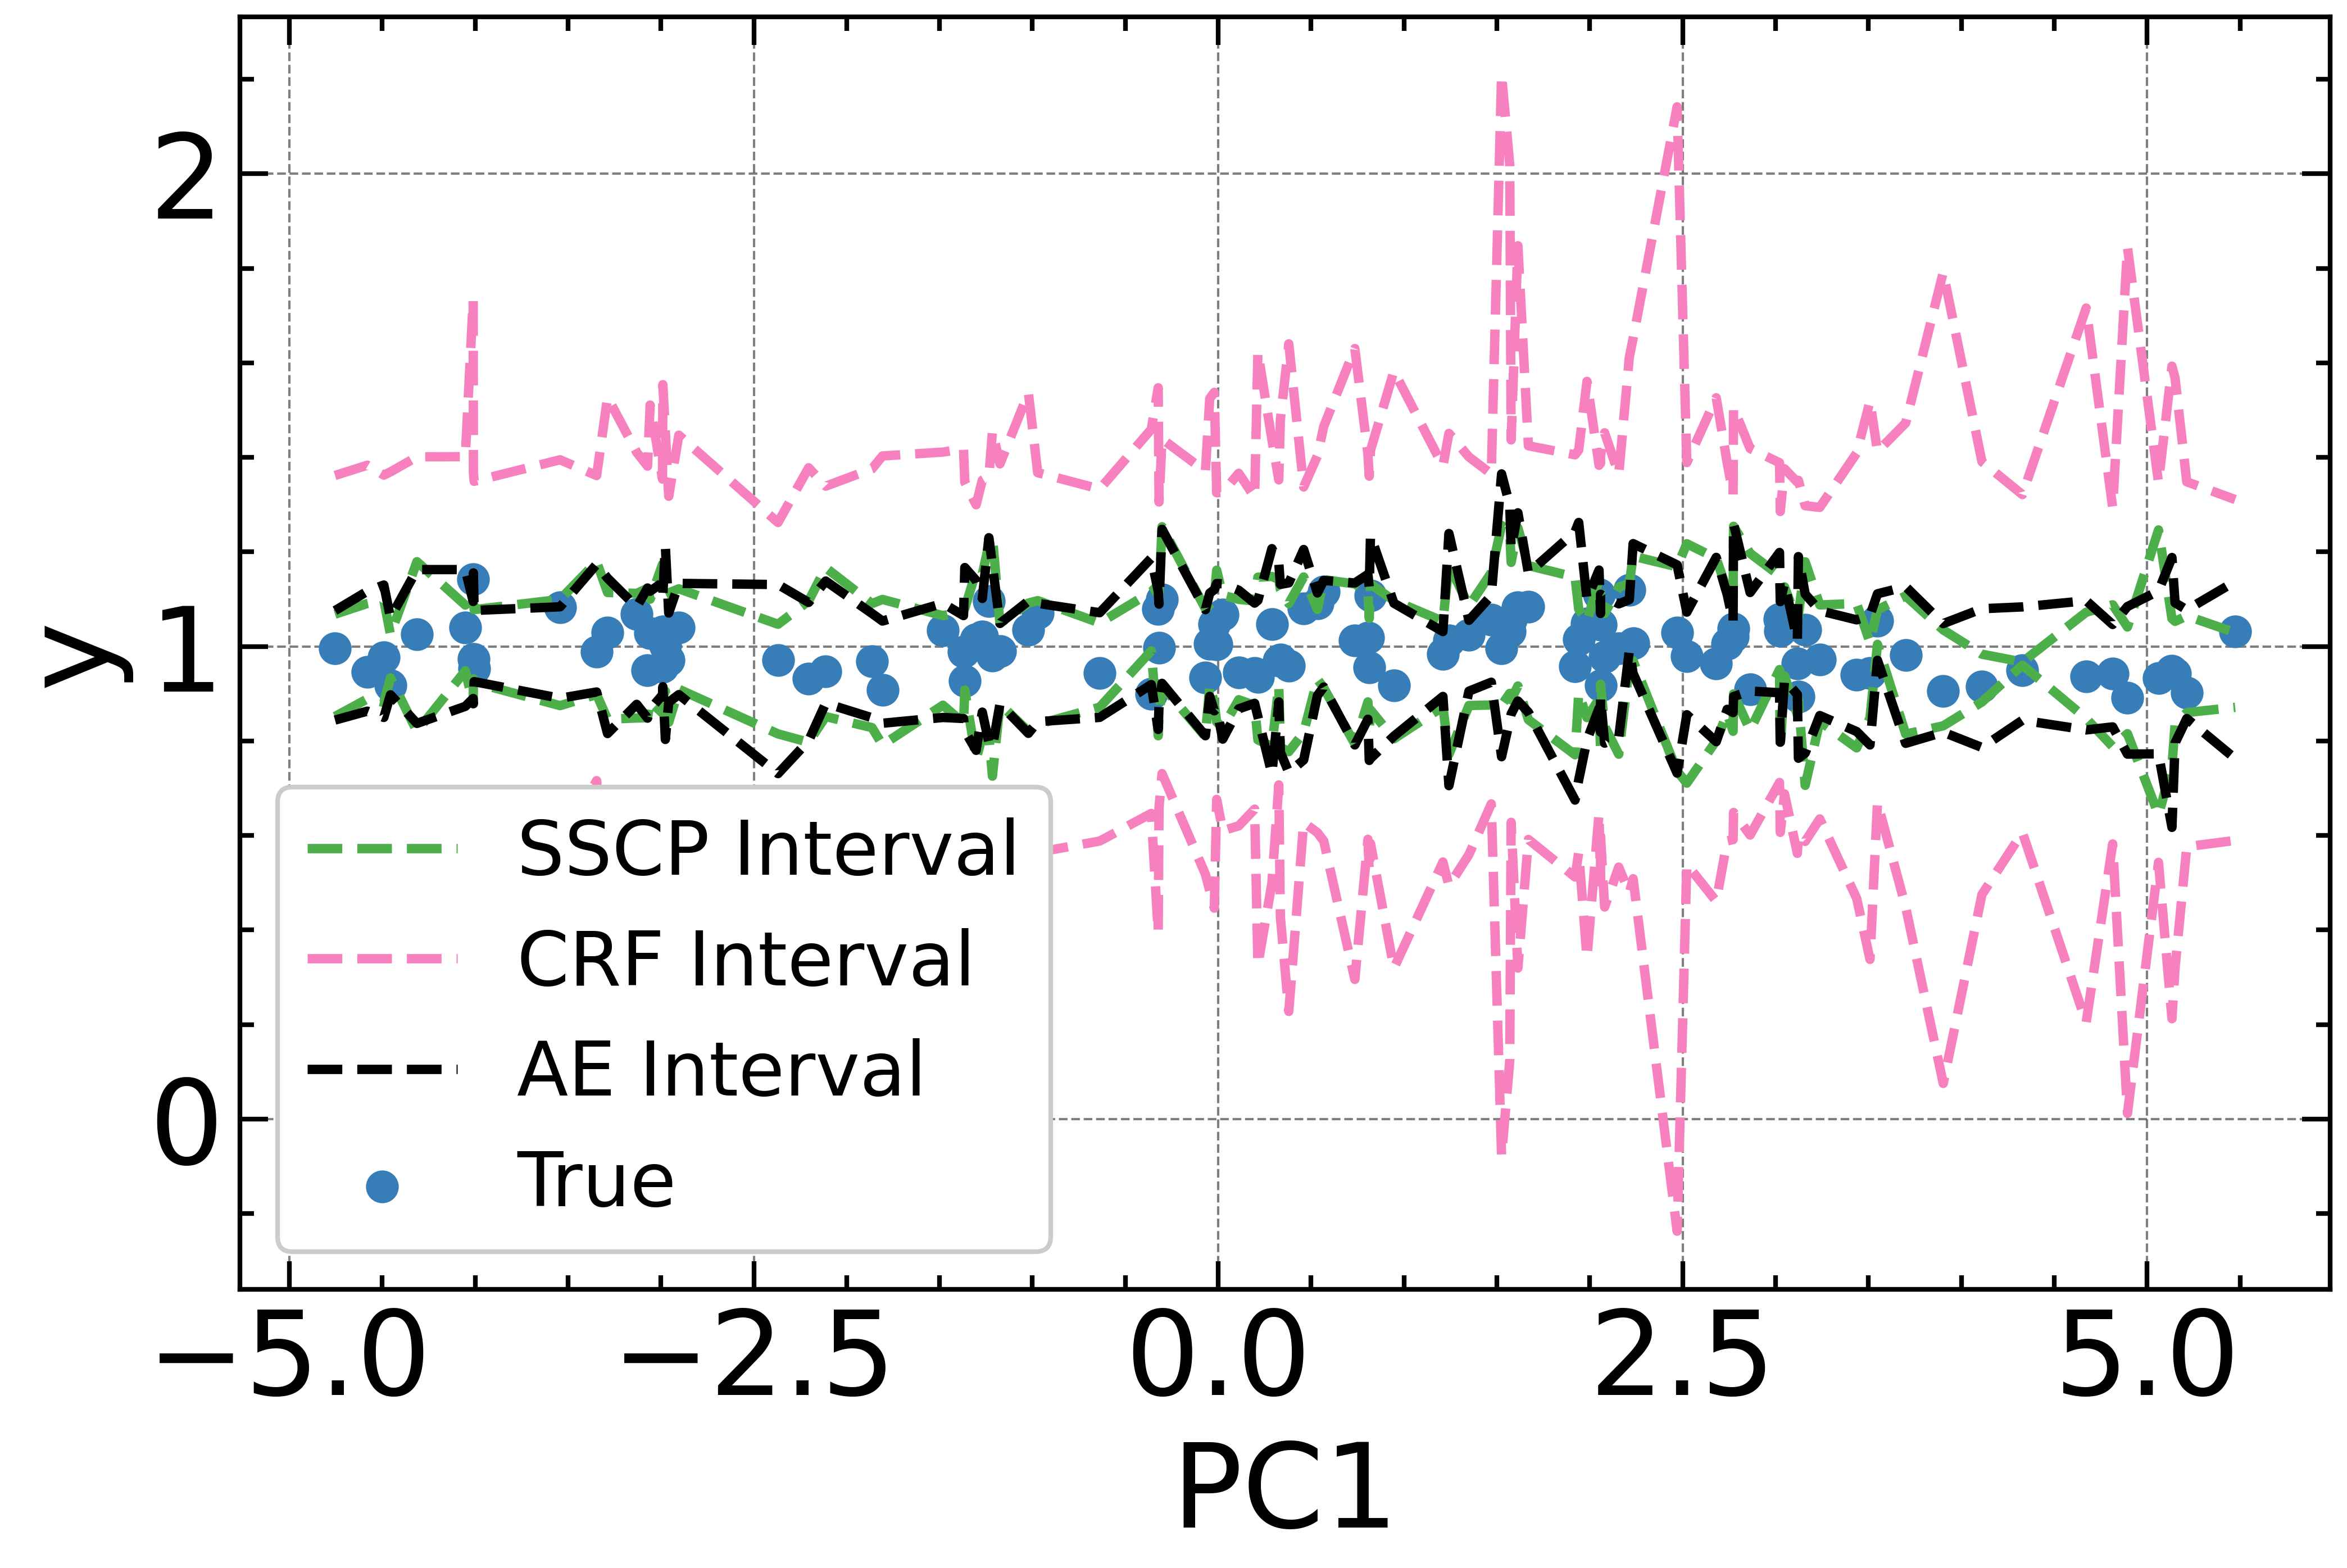

In [15]:

# set plot parameters
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

FONT=25
plt.rc("font", size=FONT)  # controls default text sizes
# plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=16)  # legend fontsize
plt.rc("figure", titlesize=FONT)  # fontsize of the figure title

n=int(len(X_test_sc)*0.25)

ids = np.argsort(cfr_intervals)[-n:]

pca = PCA(n_components=1)
pca.fit(X_train_sc)
X_train_pca1 = pca.transform(X_train_sc)
X_test_pca1 = pca.transform(X_test_sc)

sortids = np.argsort(X_test_pca1.reshape(-1)[ids])

plt.figure(figsize=(8,5))
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], vime_upper.reshape(-1)[ids][sortids], color='#4DAF4A', label='SSCP Interval', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], cfr_upper.reshape(-1)[ids][sortids], color='#F781BF', label='CRF Interval', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], ae_upper.reshape(-1)[ids][sortids], color='k', label='AE Interval', linestyle='--')

plt.plot(X_test_pca1.reshape(-1)[ids][sortids], vime_lower.reshape(-1)[ids][sortids], color='#4DAF4A', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], cfr_lower.reshape(-1)[ids][sortids], color='#F781BF', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], ae_lower.reshape(-1)[ids][sortids], color='k', linestyle='--')

plt.scatter(X_test_pca1.reshape(-1)[ids], y_test_sc.reshape(-1)[ids], color='#377EB8', label='True')
plt.legend(loc=3)
plt.xlabel('PC1')
plt.ylabel('y')
#plt.savefig('../figures/intervals_star.pdf')


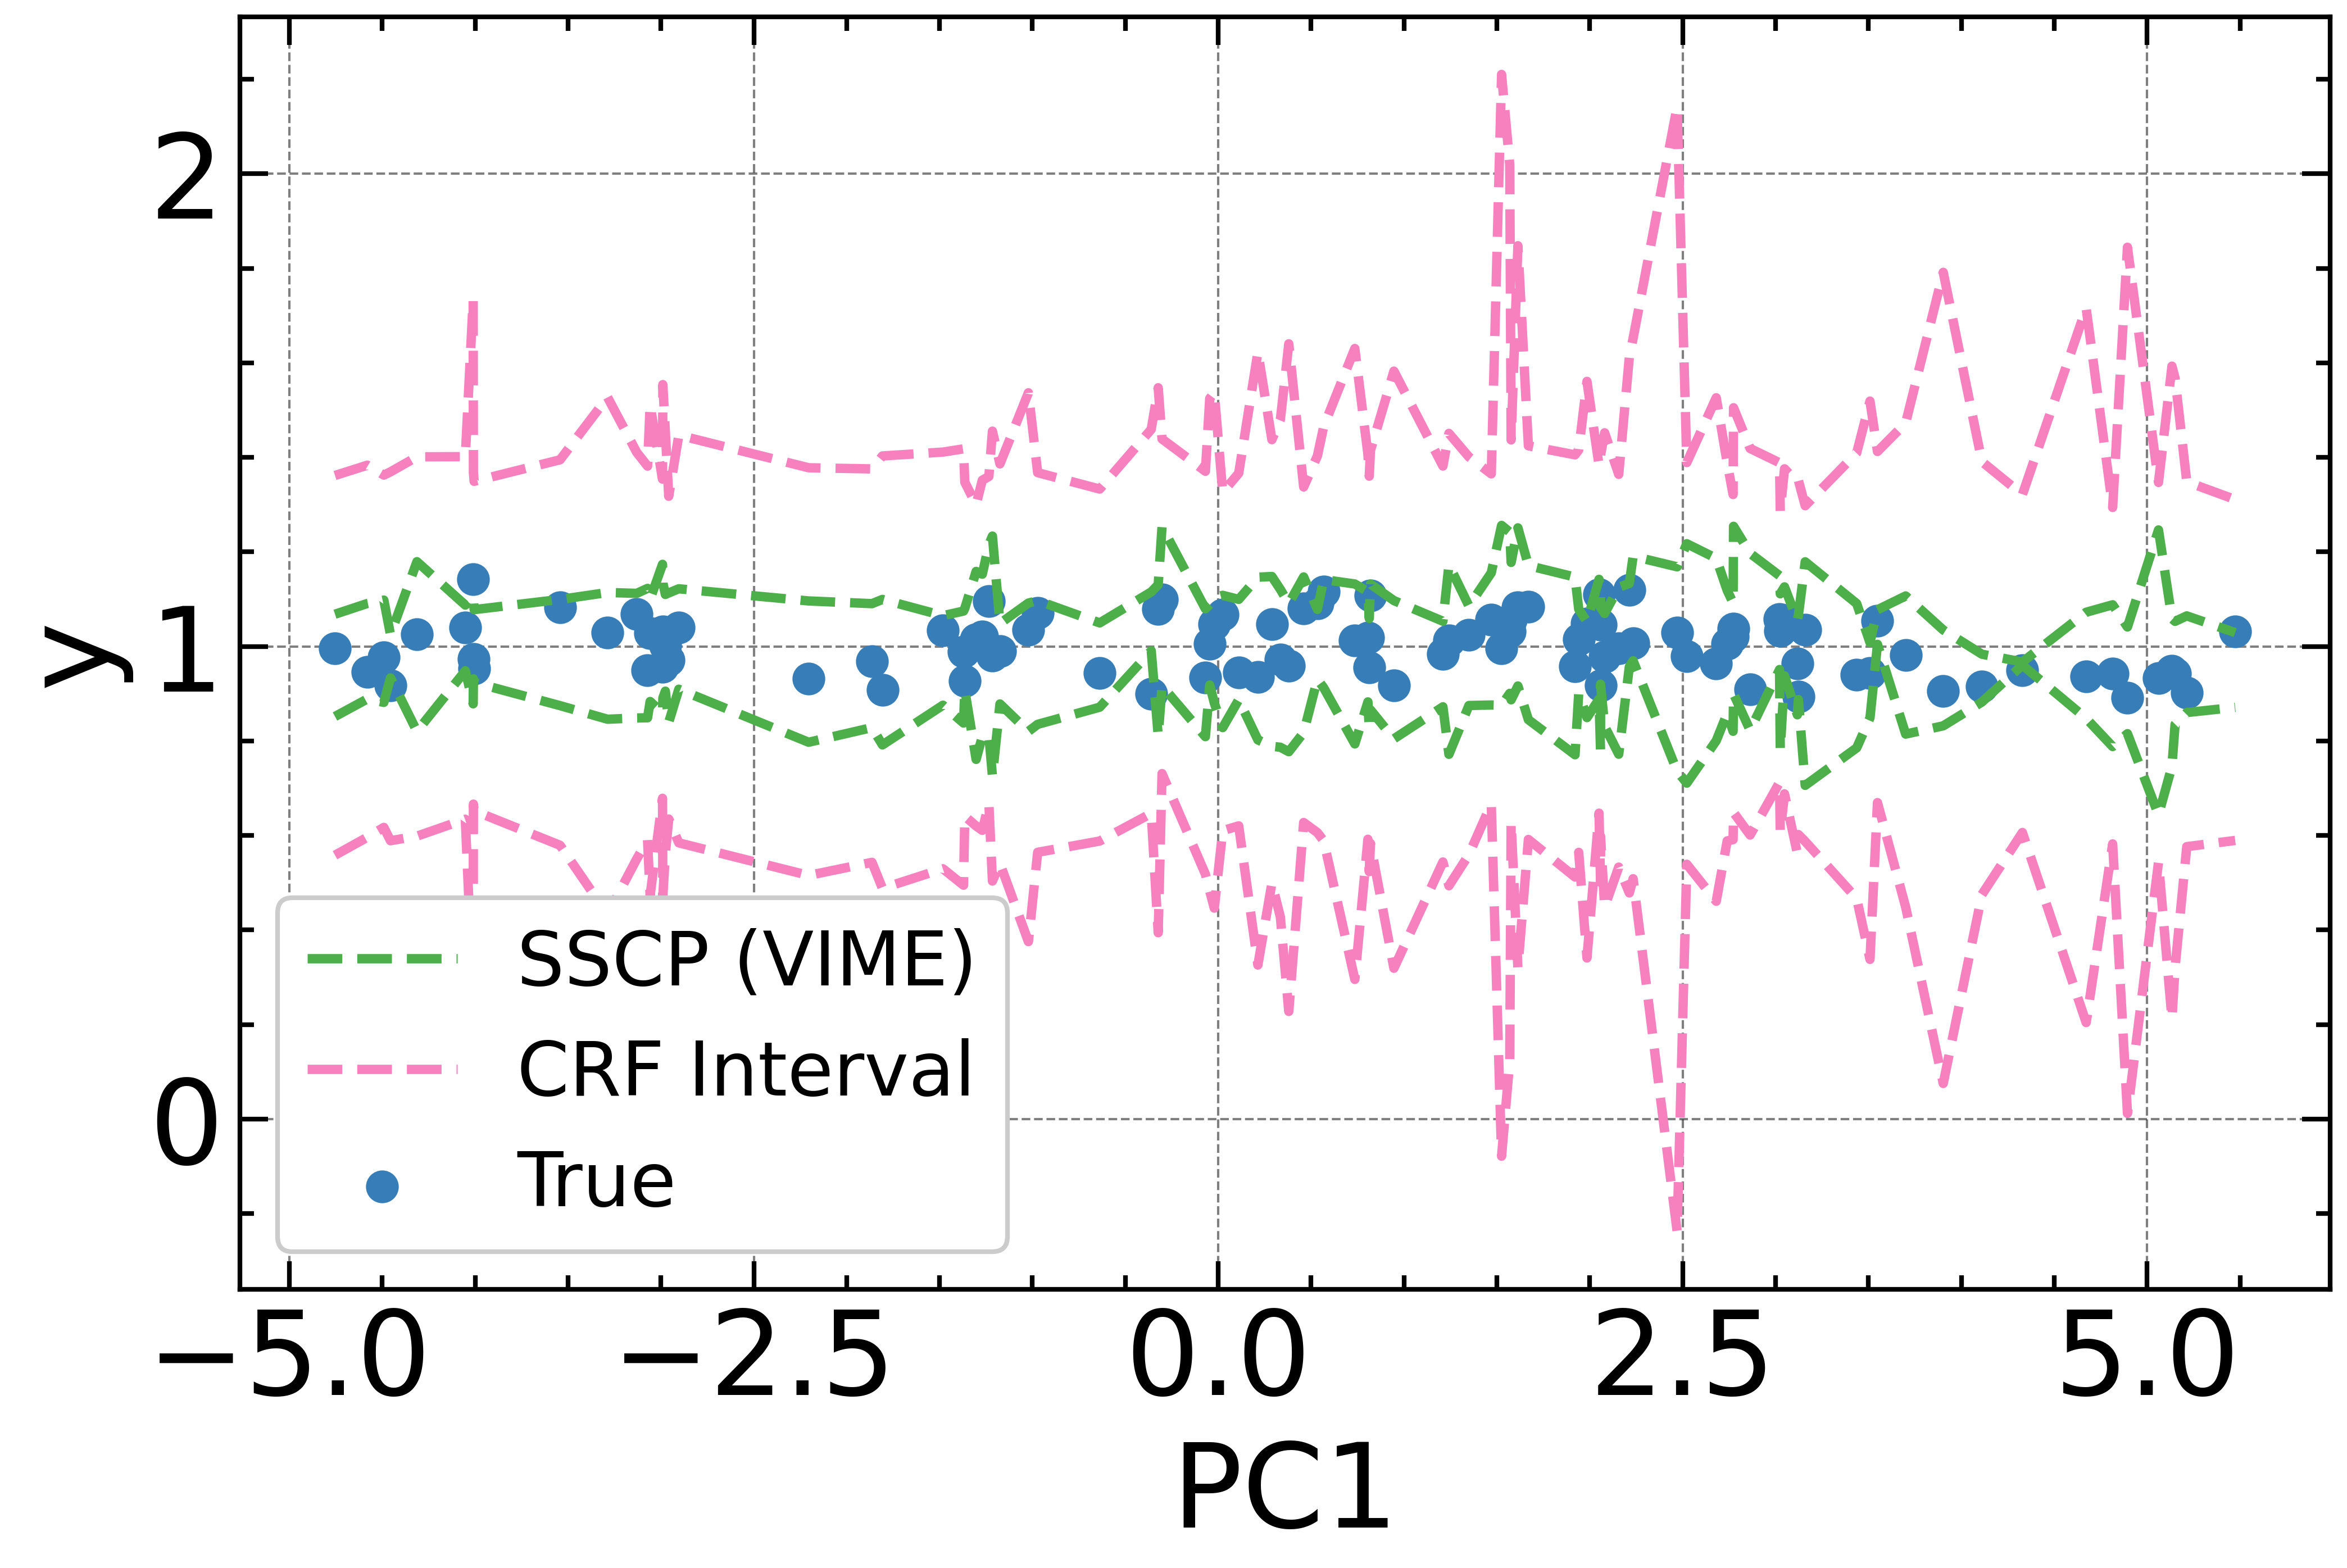

In [16]:
from random import sample

n=int(len(X_test_sc)*0.2)

ids = np.array(np.argsort(cfr_intervals)[-n:])

n=int(len(X_test_sc)*0.25)
n=100

ids = np.argsort(cfr_intervals)[-n:]
pca = PCA(n_components=1)
pca.fit(X_train_sc)
X_train_pca1 = pca.transform(X_train_sc)
X_test_pca1 = pca.transform(X_test_sc)

sortids = np.argsort(X_test_pca1.reshape(-1)[ids])

plt.figure(figsize=(8,5))
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], vime_upper.reshape(-1)[ids][sortids], color='#4DAF4A', label='SSCP (VIME)', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], cfr_upper.reshape(-1)[ids][sortids], color='#F781BF', label='CRF Interval', linestyle='--')
#plt.plot(X_test_pca1.reshape(-1)[ids][sortids], ae_upper.reshape(-1)[ids][sortids], color='k', label='SSCP (AE)', linestyle='--')

plt.plot(X_test_pca1.reshape(-1)[ids][sortids], vime_lower.reshape(-1)[ids][sortids], color='#4DAF4A', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], cfr_lower.reshape(-1)[ids][sortids], color='#F781BF', linestyle='--')
#plt.plot(X_test_pca1.reshape(-1)[ids][sortids], ae_lower.reshape(-1)[ids][sortids], color='k', linestyle='--')

plt.scatter(X_test_pca1.reshape(-1)[ids], y_test_sc.reshape(-1)[ids], color='#377EB8', label='True')
plt.legend(loc=3)
plt.xlabel('PC1')
plt.ylabel('y')
plt.savefig('../figures/intervals_star.pdf')


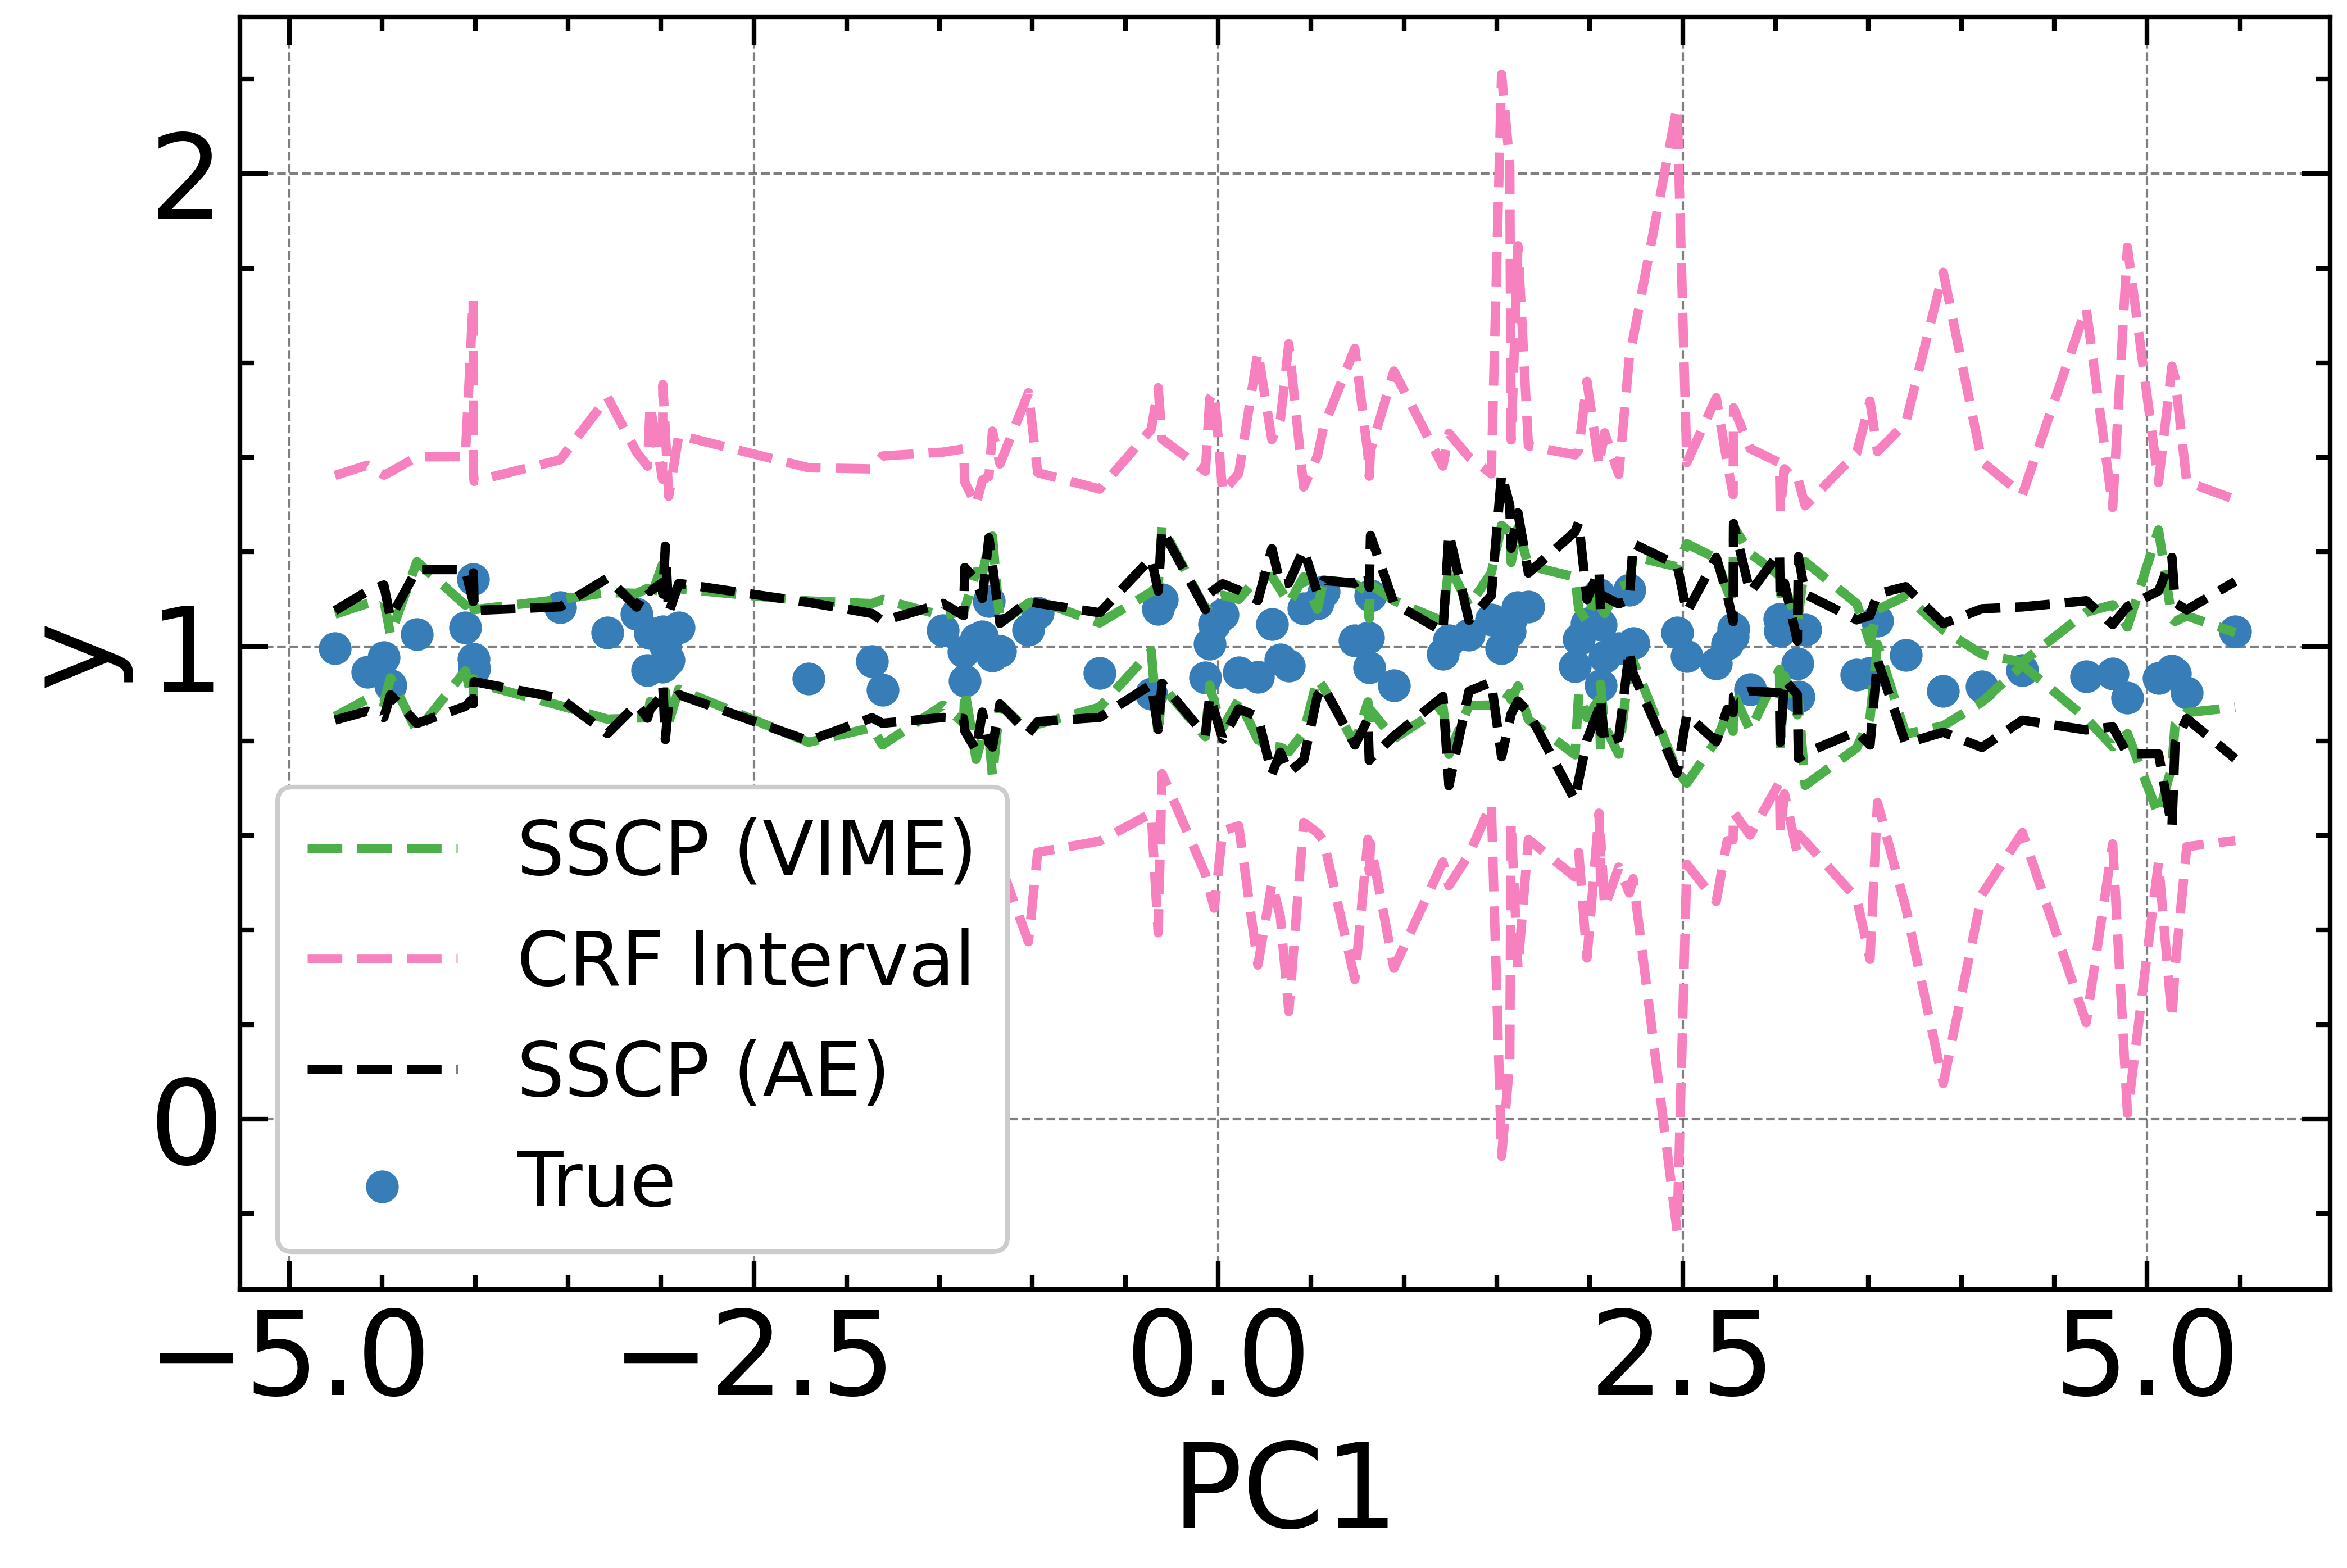

In [17]:
from random import sample

n=int(len(X_test_sc)*0.2)

ids = np.array(np.argsort(cfr_intervals)[-n:])

n=int(len(X_test_sc)*0.25)
n=100

ids = np.argsort(cfr_intervals)[-n:]
pca = PCA(n_components=1)
pca.fit(X_train_sc)
X_train_pca1 = pca.transform(X_train_sc)
X_test_pca1 = pca.transform(X_test_sc)

sortids = np.argsort(X_test_pca1.reshape(-1)[ids])

plt.figure(figsize=(8,5))
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], vime_upper.reshape(-1)[ids][sortids], color='#4DAF4A', label='SSCP (VIME)', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], cfr_upper.reshape(-1)[ids][sortids], color='#F781BF', label='CRF Interval', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], ae_upper.reshape(-1)[ids][sortids], color='k', label='SSCP (AE)', linestyle='--')

plt.plot(X_test_pca1.reshape(-1)[ids][sortids], vime_lower.reshape(-1)[ids][sortids], color='#4DAF4A', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], cfr_lower.reshape(-1)[ids][sortids], color='#F781BF', linestyle='--')
plt.plot(X_test_pca1.reshape(-1)[ids][sortids], ae_lower.reshape(-1)[ids][sortids], color='k', linestyle='--')

plt.scatter(X_test_pca1.reshape(-1)[ids], y_test_sc.reshape(-1)[ids], color='#377EB8', label='True')
plt.legend(loc=3)
plt.xlabel('PC1')
plt.ylabel('y')
plt.savefig('../figures/intervals_star_ae_vime.pdf')


In [18]:
def width_vec(lower_bound,upper_bound,y_true):
    in_the_range = np.sum((y_true >= lower_bound) & (y_true <= upper_bound))
    avg_length = abs(upper_bound - lower_bound)
    return avg_length

def excess_vec(lb, ub, true):
    """
    > This function computes the average excess of the true values over the lower and upper bounds
    Args:
      true: the true values of the data
      lb: lower bound
      ub: upper bound
    Returns:
      The mean and the proportion of excess
    """
    true, lb, ub = np.array(true), np.array(lb), np.array(ub)
    excess = []
    for i in range(true.shape[0]):
        if true[i] >= lb[i] and true[i] <= ub[i]:
            excess.append(np.min([true[i] - lb[i], ub[i] - true[i]]))

    return excess


def deficet_vec(lb, ub, true):
    """
    > This function computes the average and the proportion of the time that the true value is outside the confidence
    interval
    Args:
      true: the true values of the parameters
      lb: lower bound
      ub: upper bound
    Returns:
      The mean and the proportion of the deficet
    """

    true, lb, ub = np.array(true), np.array(lb), np.array(ub)
    deficet = []
    for i in range(true.shape[0]):
        if true[i] <= lb[i] or true[i] >= ub[i]:
            deficet.append(
                np.min([np.abs(true[i] - lb[i]), np.abs(true[i] - ub[i])]),
            )

    return deficet


# Assess distributions

In [19]:
def plot_sample_curve(metric):
    
    plt.figure()
    lower, upper = cfr_lower, cfr_upper 
    width_sc = width_vec(lower,upper,y_test_sc)
    excess_sc = excess_vec(lower,upper,y_test_sc)
    deficet_sc = deficet_vec(lower,upper,y_test_sc)

    if metric=='excess':
        metric_sc = excess_sc
    elif metric=='deficet':
        metric_sc = deficet_sc
    elif metric=='width':
        metric_sc = width_sc.reshape(-1)

    ids = np.argsort(metric_sc)[::-1]

    plt.plot(range(len(metric_sc)),np.array(metric_sc)[ids.reshape(-1)], label=f'CRF: {np.mean(metric_sc):.2f}+-{np.std(metric_sc):.2f}',color='#F781BF')

    lower, upper = vime_lower, vime_upper 
    width_sc = width_vec(lower,upper,y_test_sc)
    excess_sc = excess_vec(lower,upper,y_test_sc)
    deficet_sc = deficet_vec(lower,upper,y_test_sc)

    if metric=='excess':
        metric_sc = excess_sc
    elif metric=='deficet':
        metric_sc = deficet_sc
    elif metric=='width':
        metric_sc = width_sc.reshape(-1)

    plt.plot(range(len(metric_sc)),np.sort(metric_sc)[::-1], label=f'SSCP (VIME): {np.mean(metric_sc):.2f}+-{np.std(metric_sc):.2f}',color = '#4DAF4A' )


    lower, upper = ae_lower, ae_upper 
    width_sc = width_vec(lower,upper,y_test_sc)
    excess_sc = excess_vec(lower,upper,y_test_sc)
    deficet_sc = deficet_vec(lower,upper,y_test_sc)

    if metric=='excess':
        metric_sc = excess_sc
    elif metric=='deficet':
        metric_sc = deficet_sc
    elif metric=='width':
        metric_sc = width_sc.reshape(-1)

    plt.plot(range(len(metric_sc)),np.sort(metric_sc)[::-1], label=f'SSCP (AE): {np.mean(metric_sc):.2f}+-{np.std(metric_sc):.2f}')

    plt.xlabel('Samples')
    plt.ylabel(f'{metric}')
    plt.legend()

    plt.savefig(f'../figures/ordered_plot_{metric}.pdf')



def plot_distributions(metric):

    plt.figure()
    lower, upper = cfr_lower, cfr_upper 
    width_sc = width_vec(lower,upper,y_test_sc)
    excess_sc = excess_vec(lower,upper,y_test_sc)
    deficet_sc = deficet_vec(lower,upper,y_test_sc)


    if metric=='excess':
        metric_sc = excess_sc
    elif metric=='deficet':
        metric_sc = deficet_sc
    elif metric=='width':
        metric_sc = width_sc.reshape(-1)

    ids = np.argsort(metric_sc)[::-1]



    sns.distplot(np.array(metric_sc)[ids.reshape(-1)], label=f'CRF: {np.mean(metric_sc):.2f}+-{np.std(metric_sc):.2f}', color='#F781BF')

    lower, upper = vime_lower, vime_upper 
    width_sc = width_vec(lower,upper,y_test_sc)
    excess_sc = excess_vec(lower,upper,y_test_sc)
    deficet_sc = deficet_vec(lower,upper,y_test_sc)

    if metric=='excess':
        metric_sc = excess_sc
    elif metric=='deficet':
        metric_sc = deficet_sc
    elif metric=='width':
        metric_sc = width_sc.reshape(-1)
    sns.distplot(np.sort(metric_sc)[::-1], label=f'SSCP(VIME): {np.mean(metric_sc):.2f}+-{np.std(metric_sc):.2f}', color = '#4DAF4A' )


    lower, upper = ae_lower, ae_upper 
    width_sc = width_vec(lower,upper,y_test_sc)
    excess_sc = excess_vec(lower,upper,y_test_sc)
    deficet_sc = deficet_vec(lower,upper,y_test_sc)

    if metric=='excess':
        metric_sc = excess_sc
    elif metric=='deficet':
        metric_sc = deficet_sc
    elif metric=='width':
        metric_sc = width_sc.reshape(-1)

    sns.distplot(np.sort(metric_sc)[::-1], label=f'SSCP (AE): {np.mean(metric_sc):.2f}+-{np.std(metric_sc):.2f}' )

    plt.xlabel(metric)

    plt.legend()

    plt.savefig(f'../figures/distplot_{metric}.pdf')

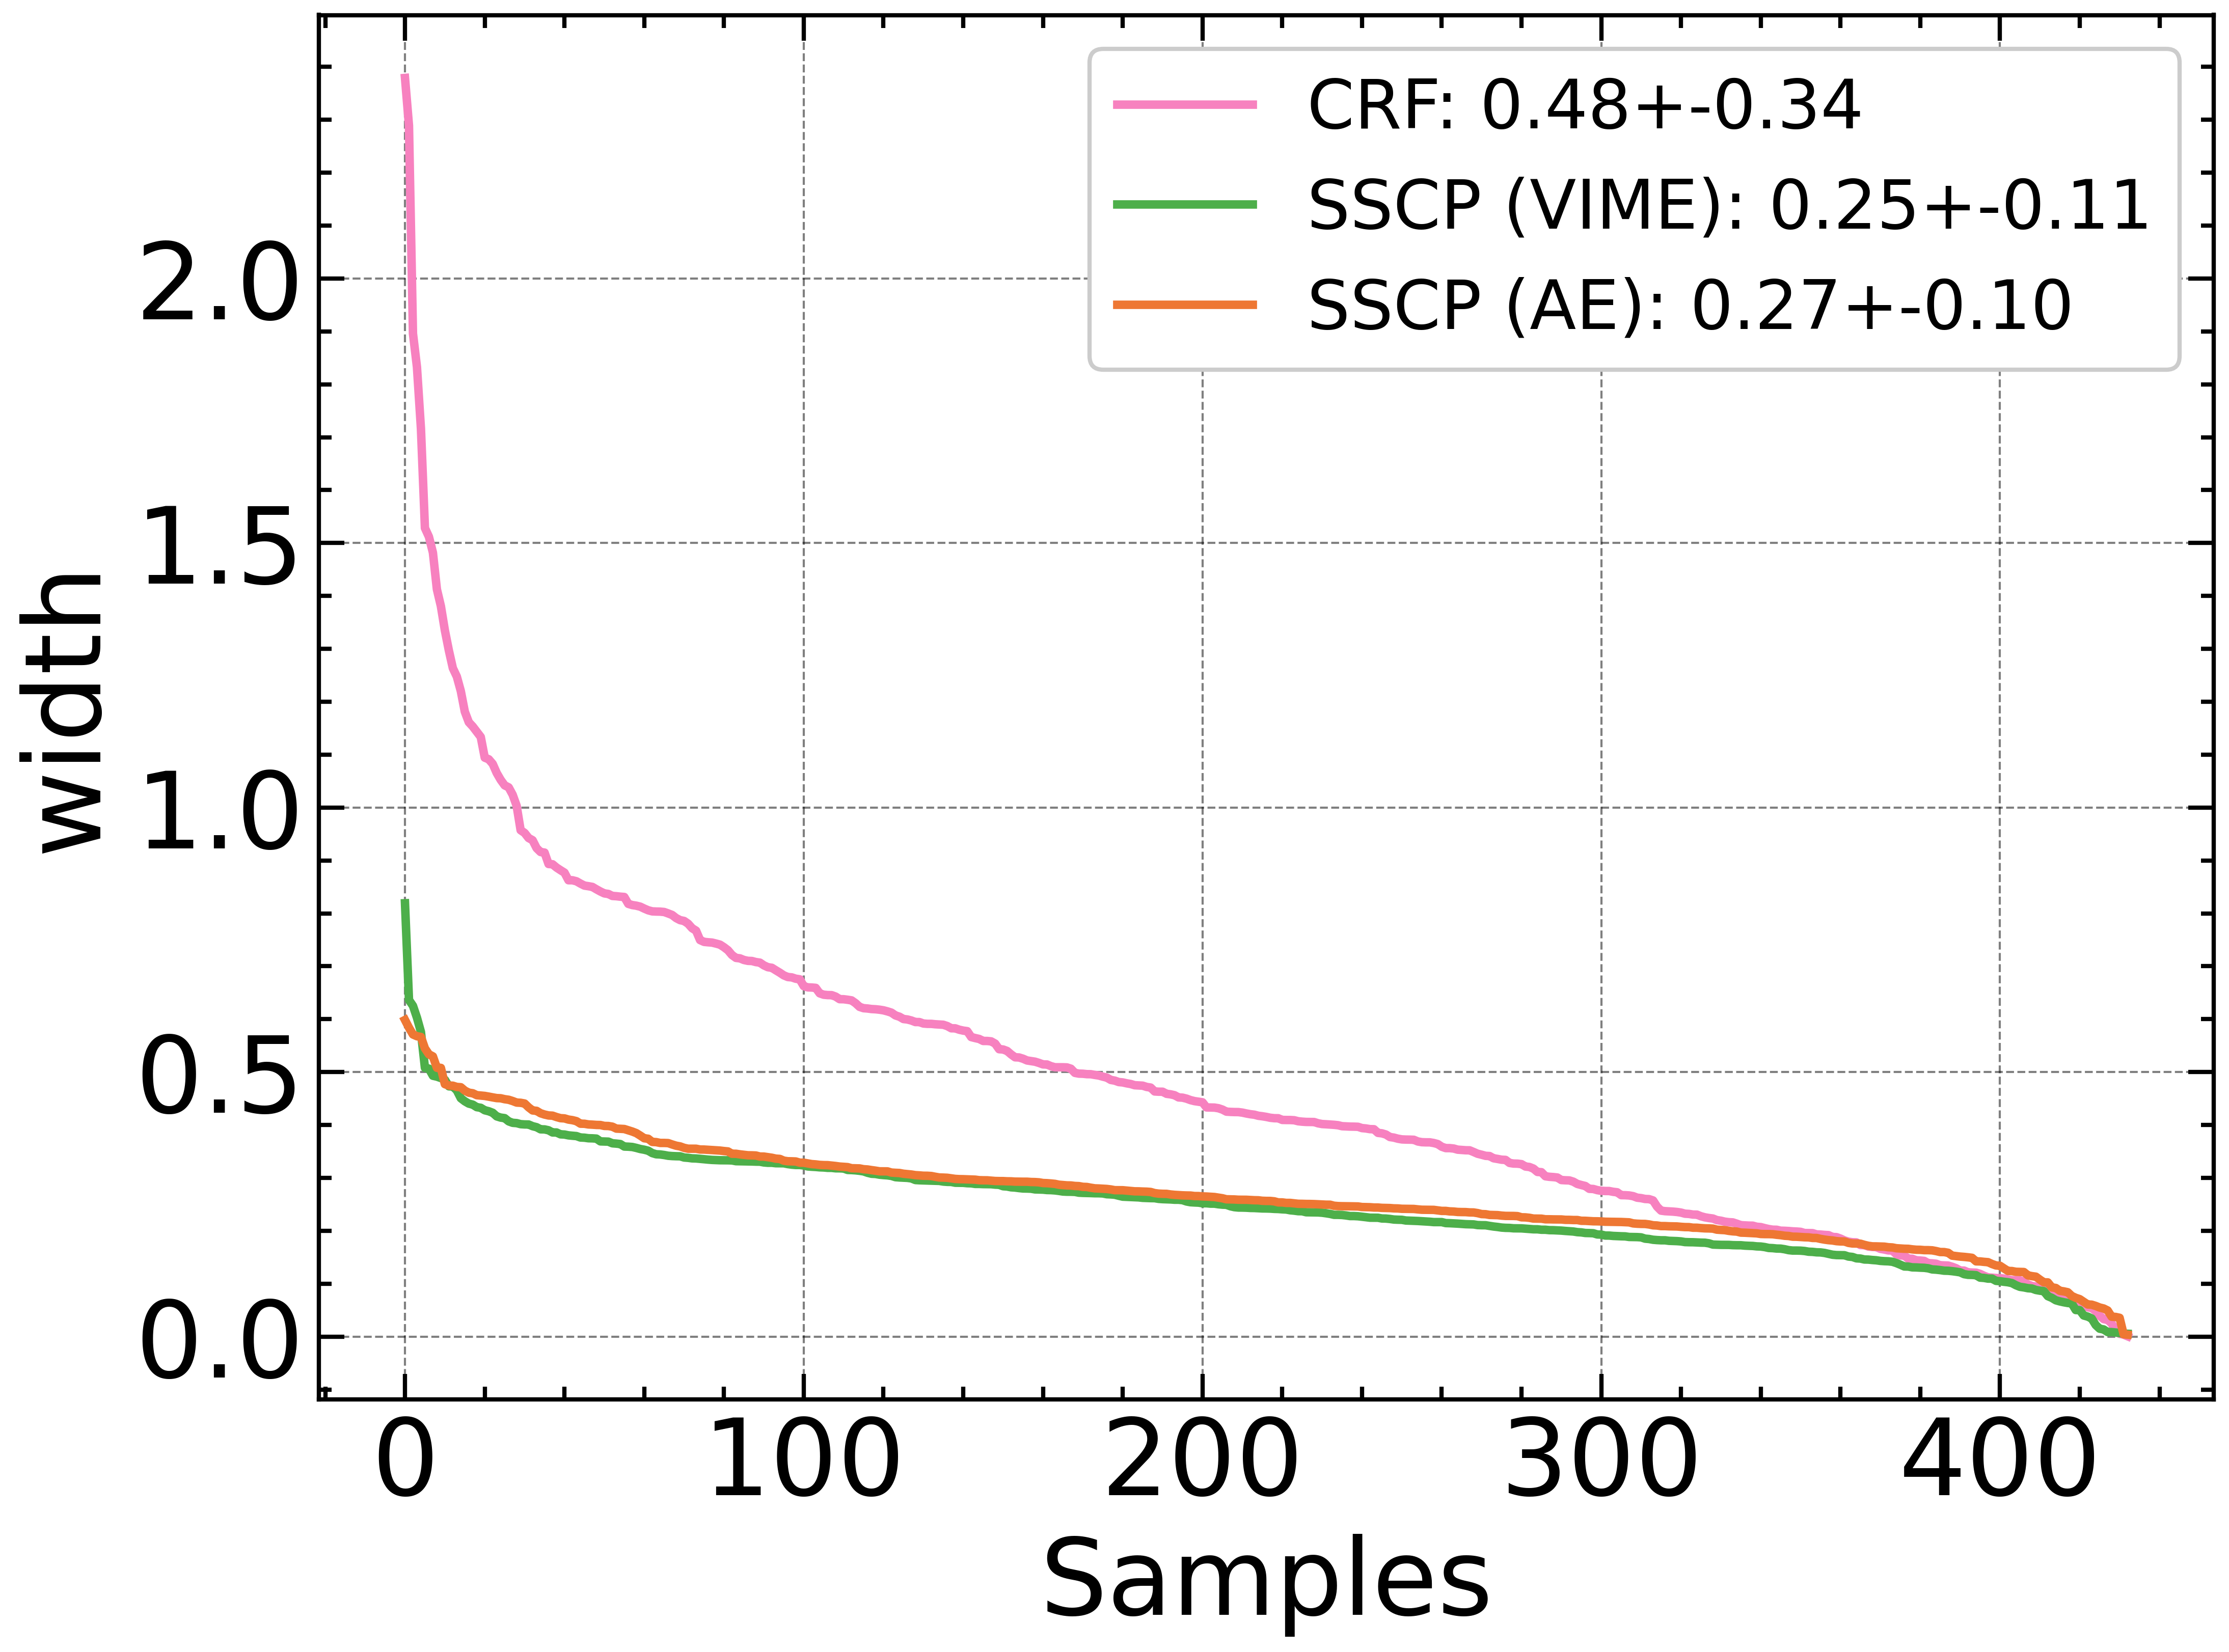

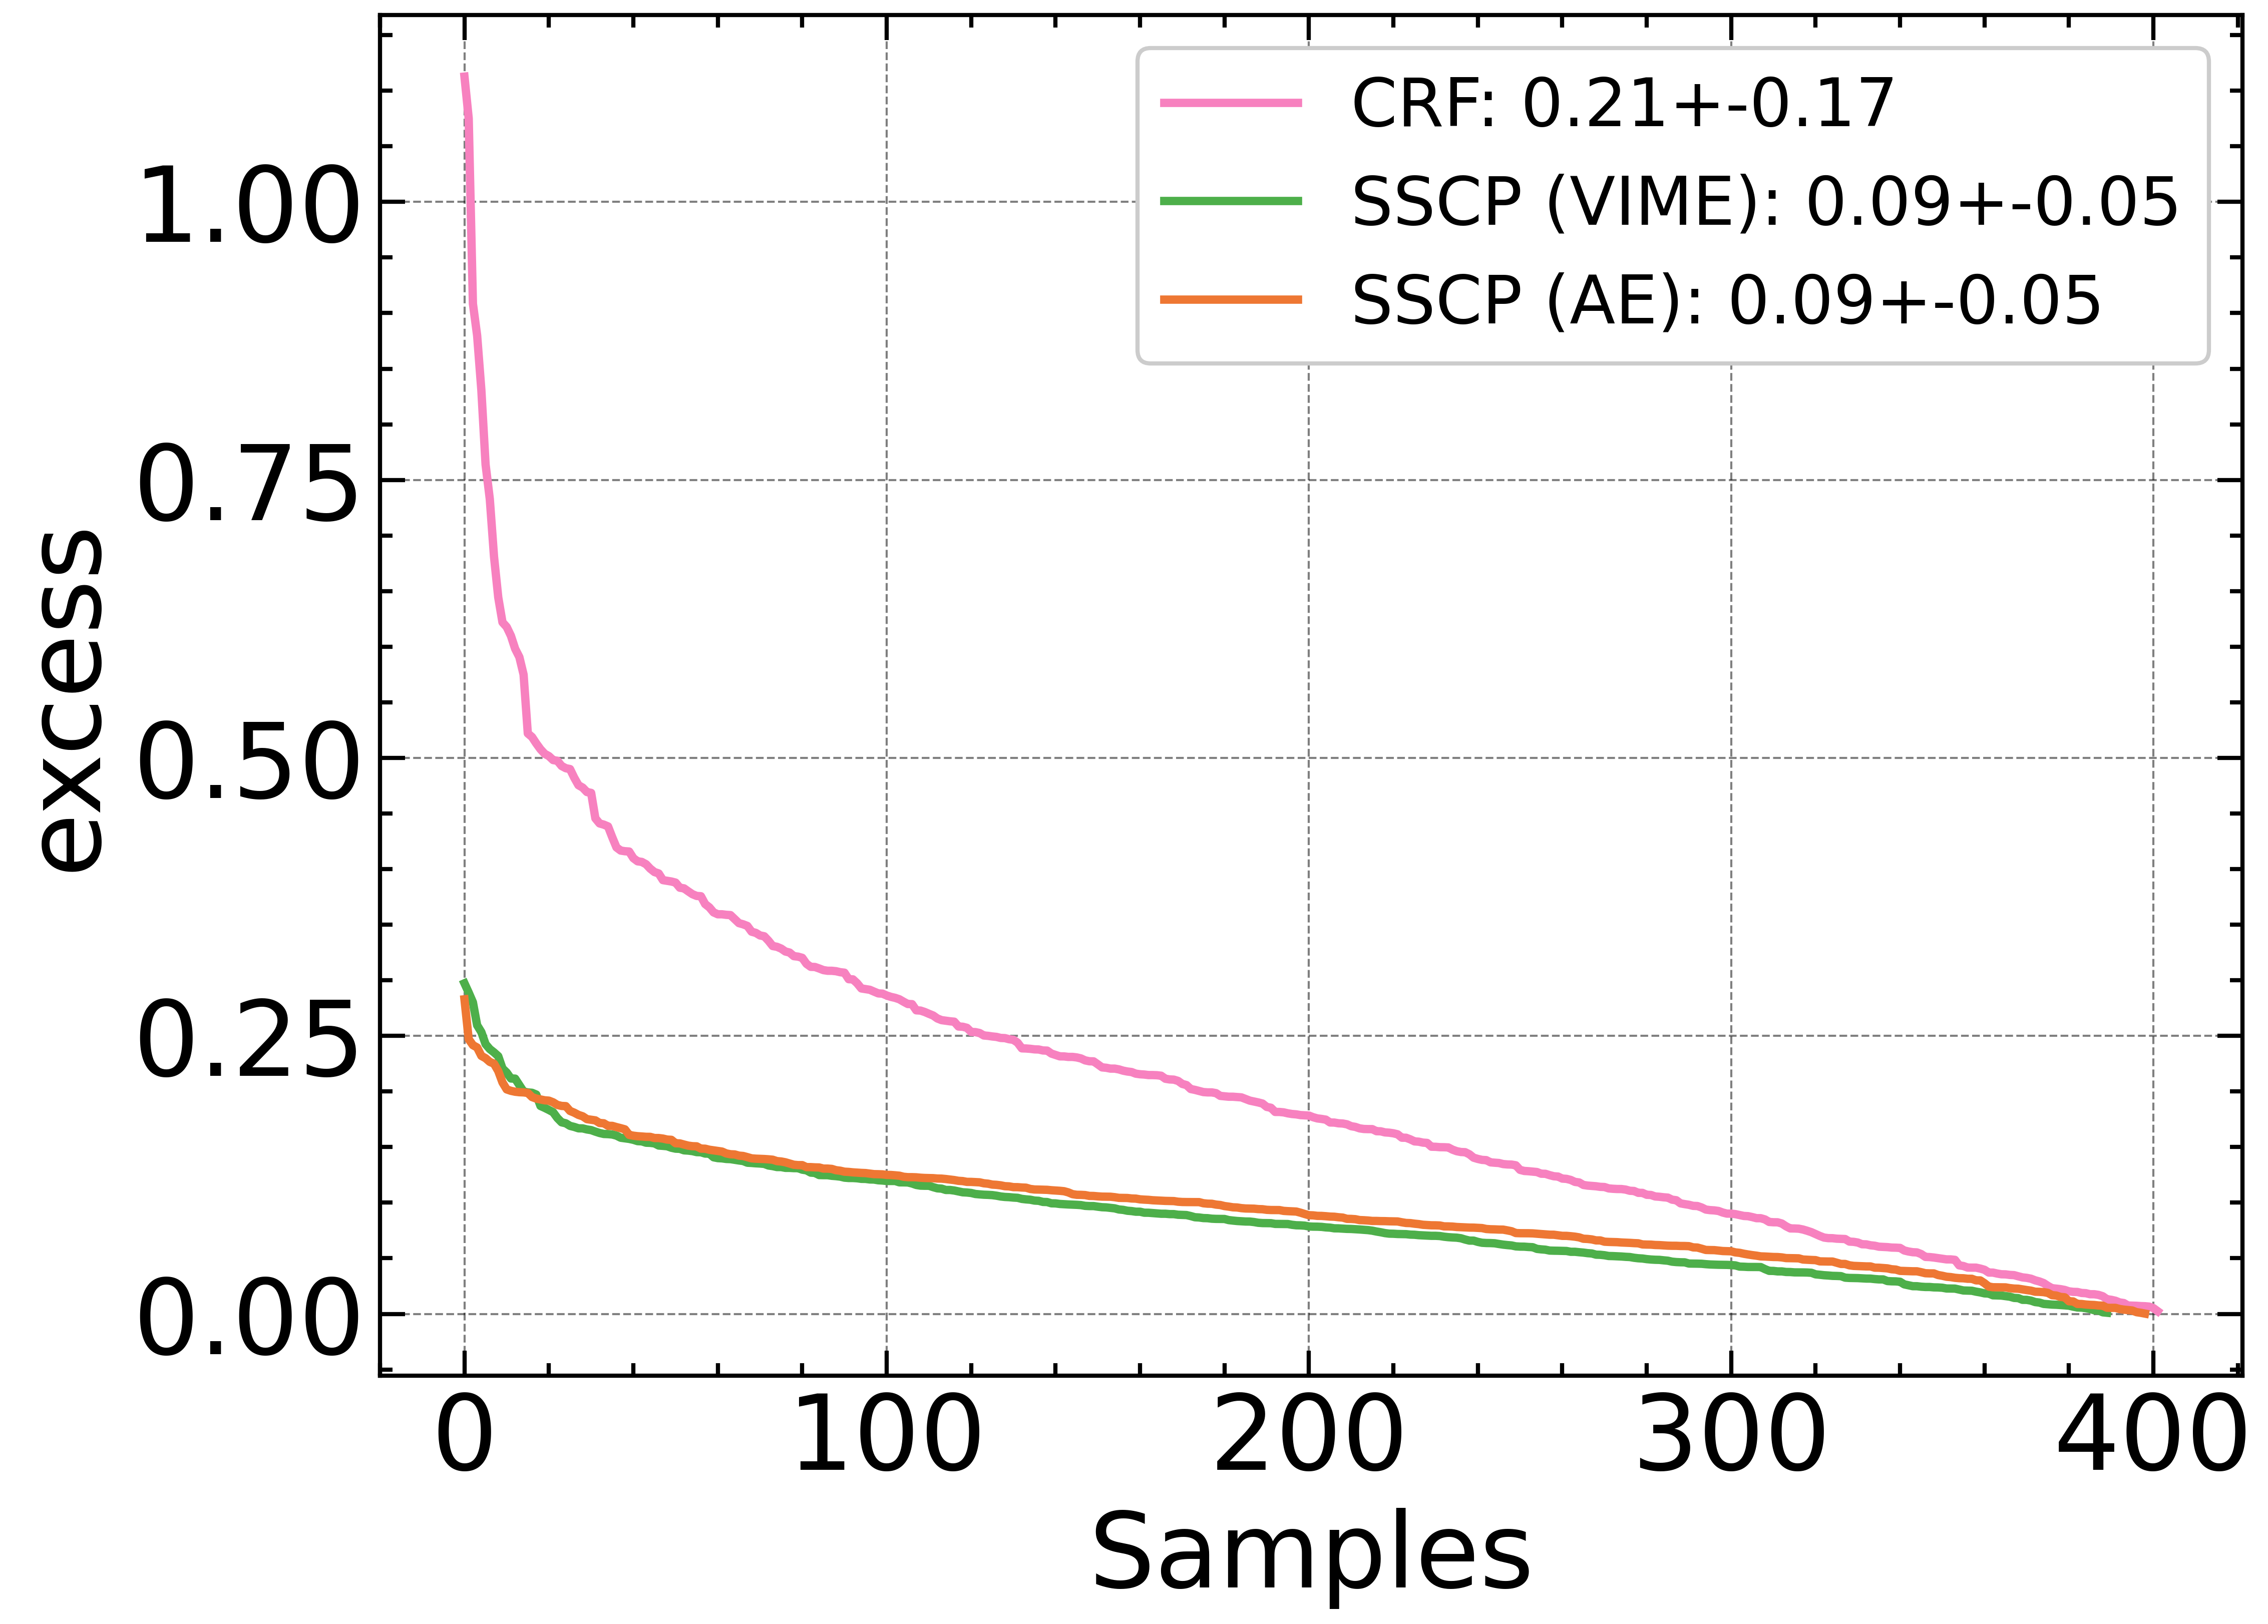

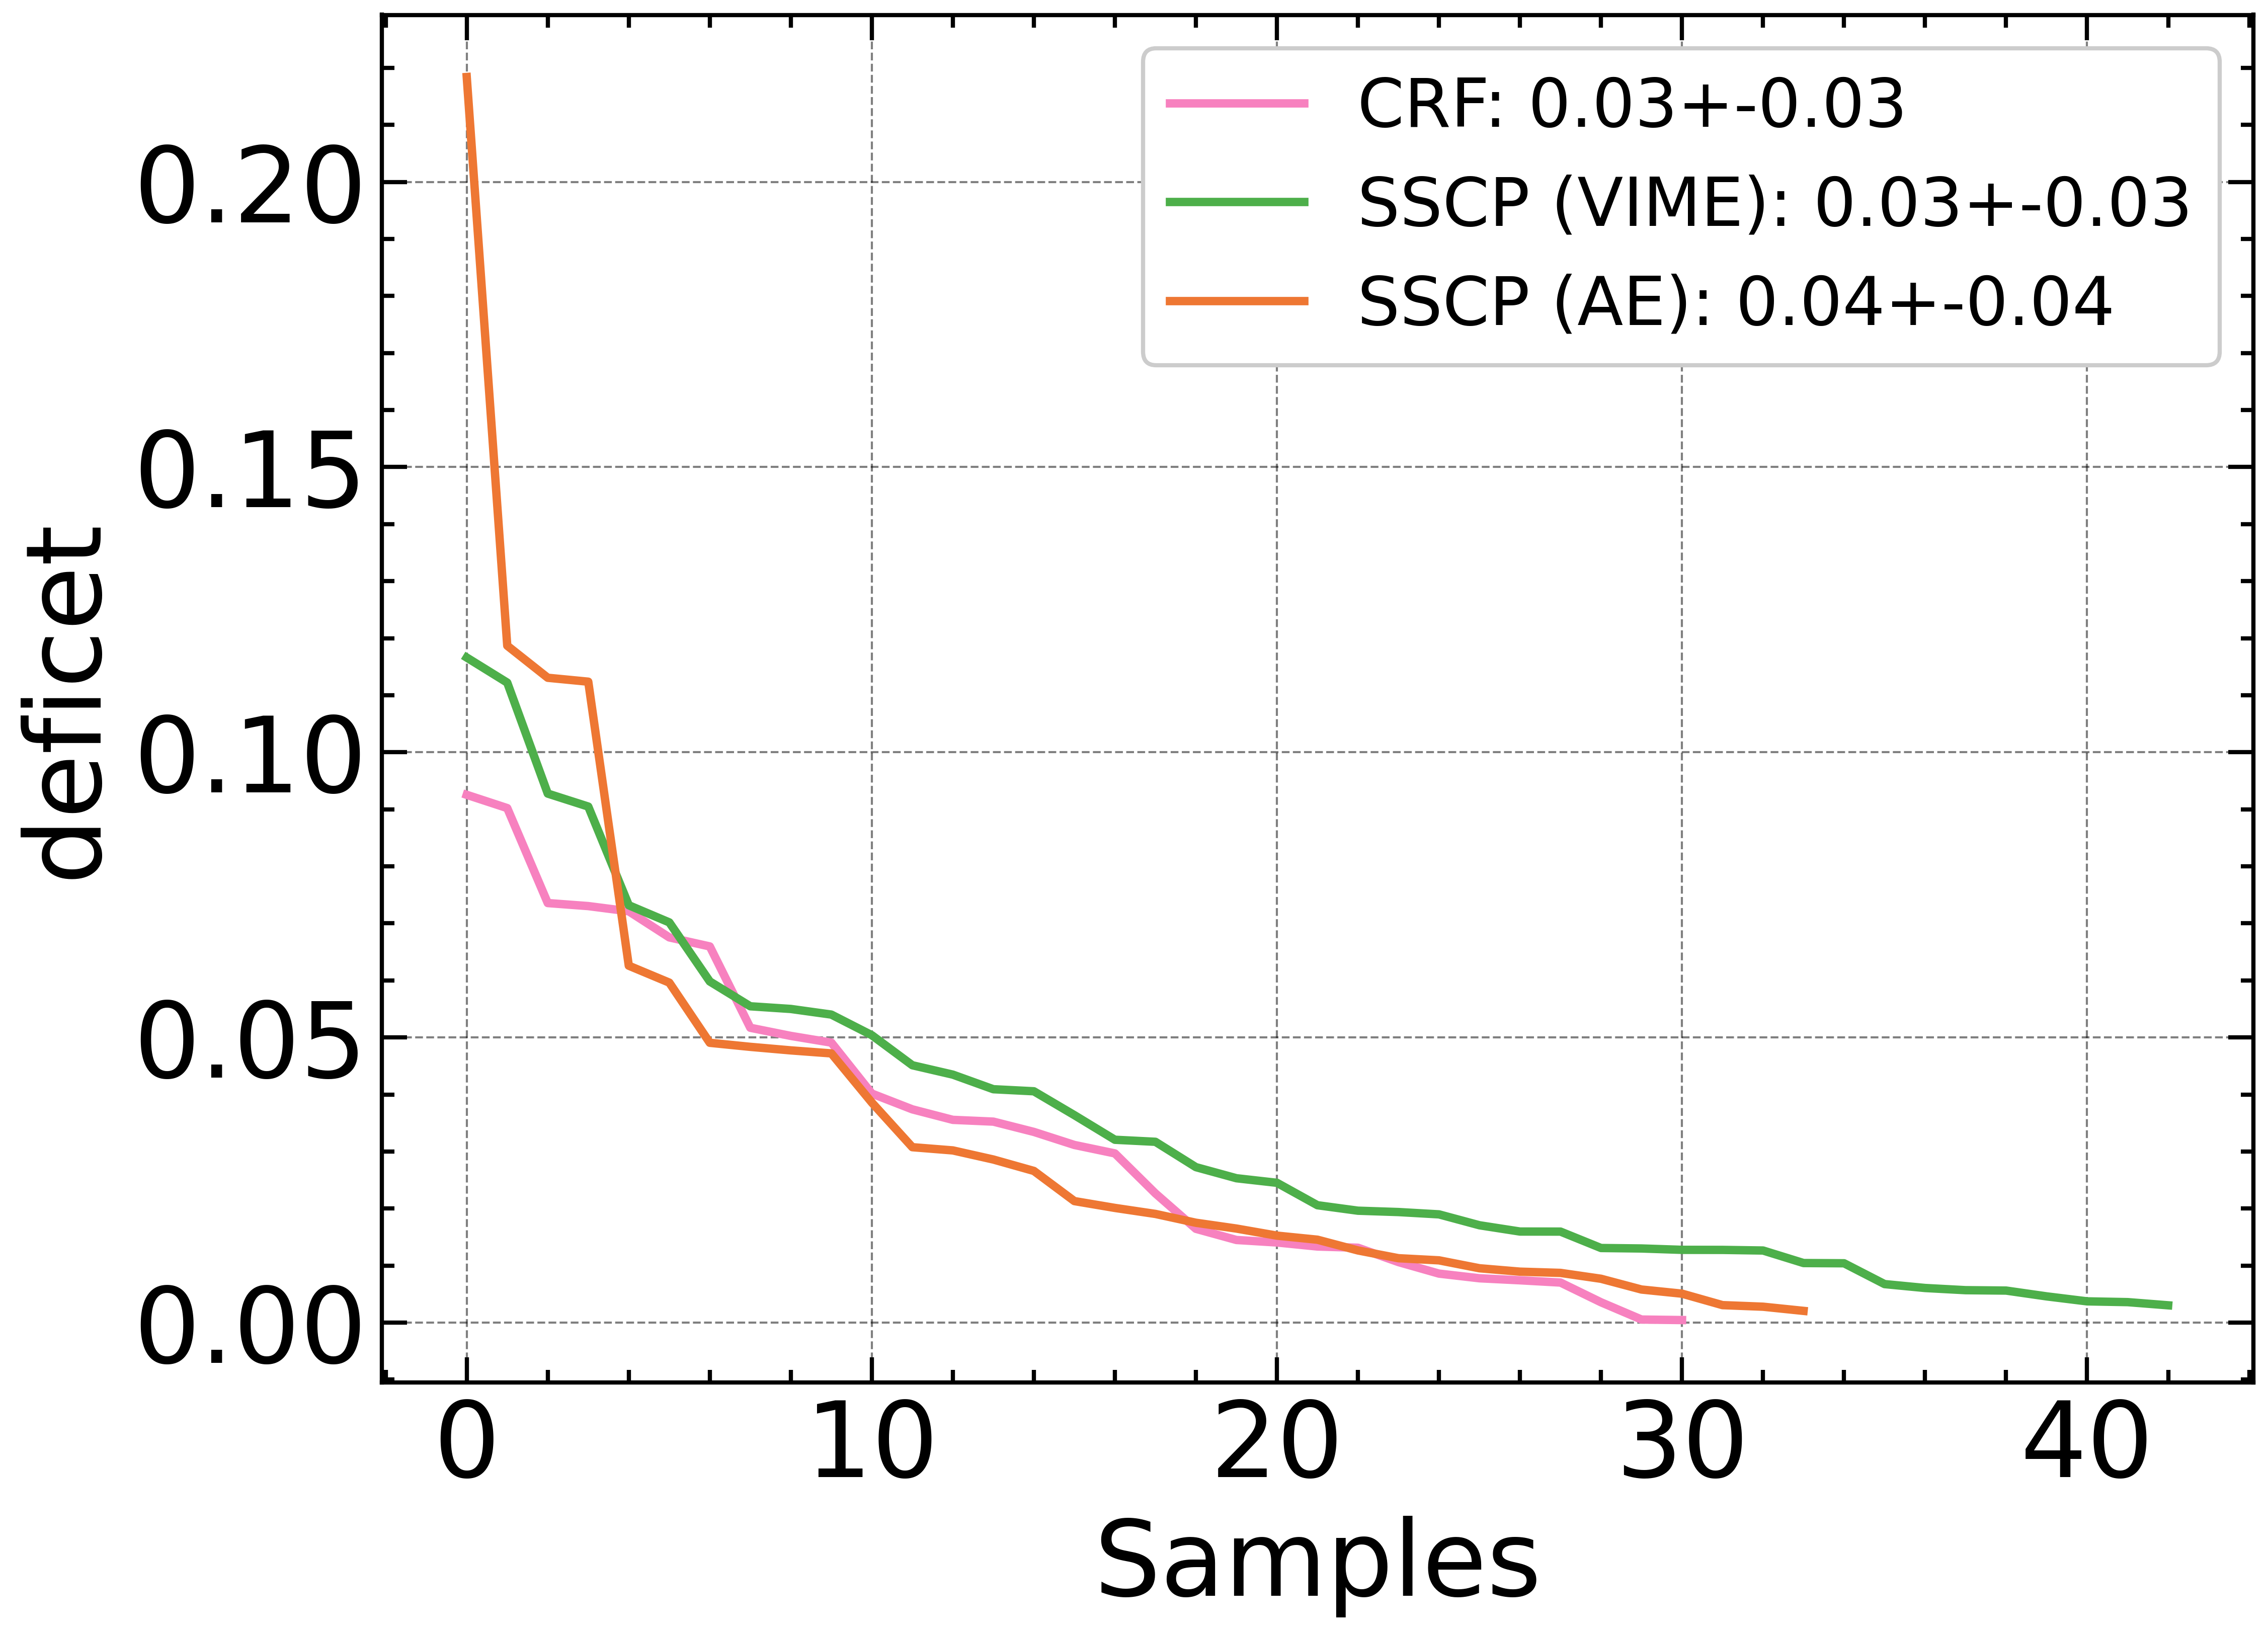

In [20]:
plot_sample_curve(metric='width')
plot_sample_curve(metric='excess')
plot_sample_curve(metric='deficet')

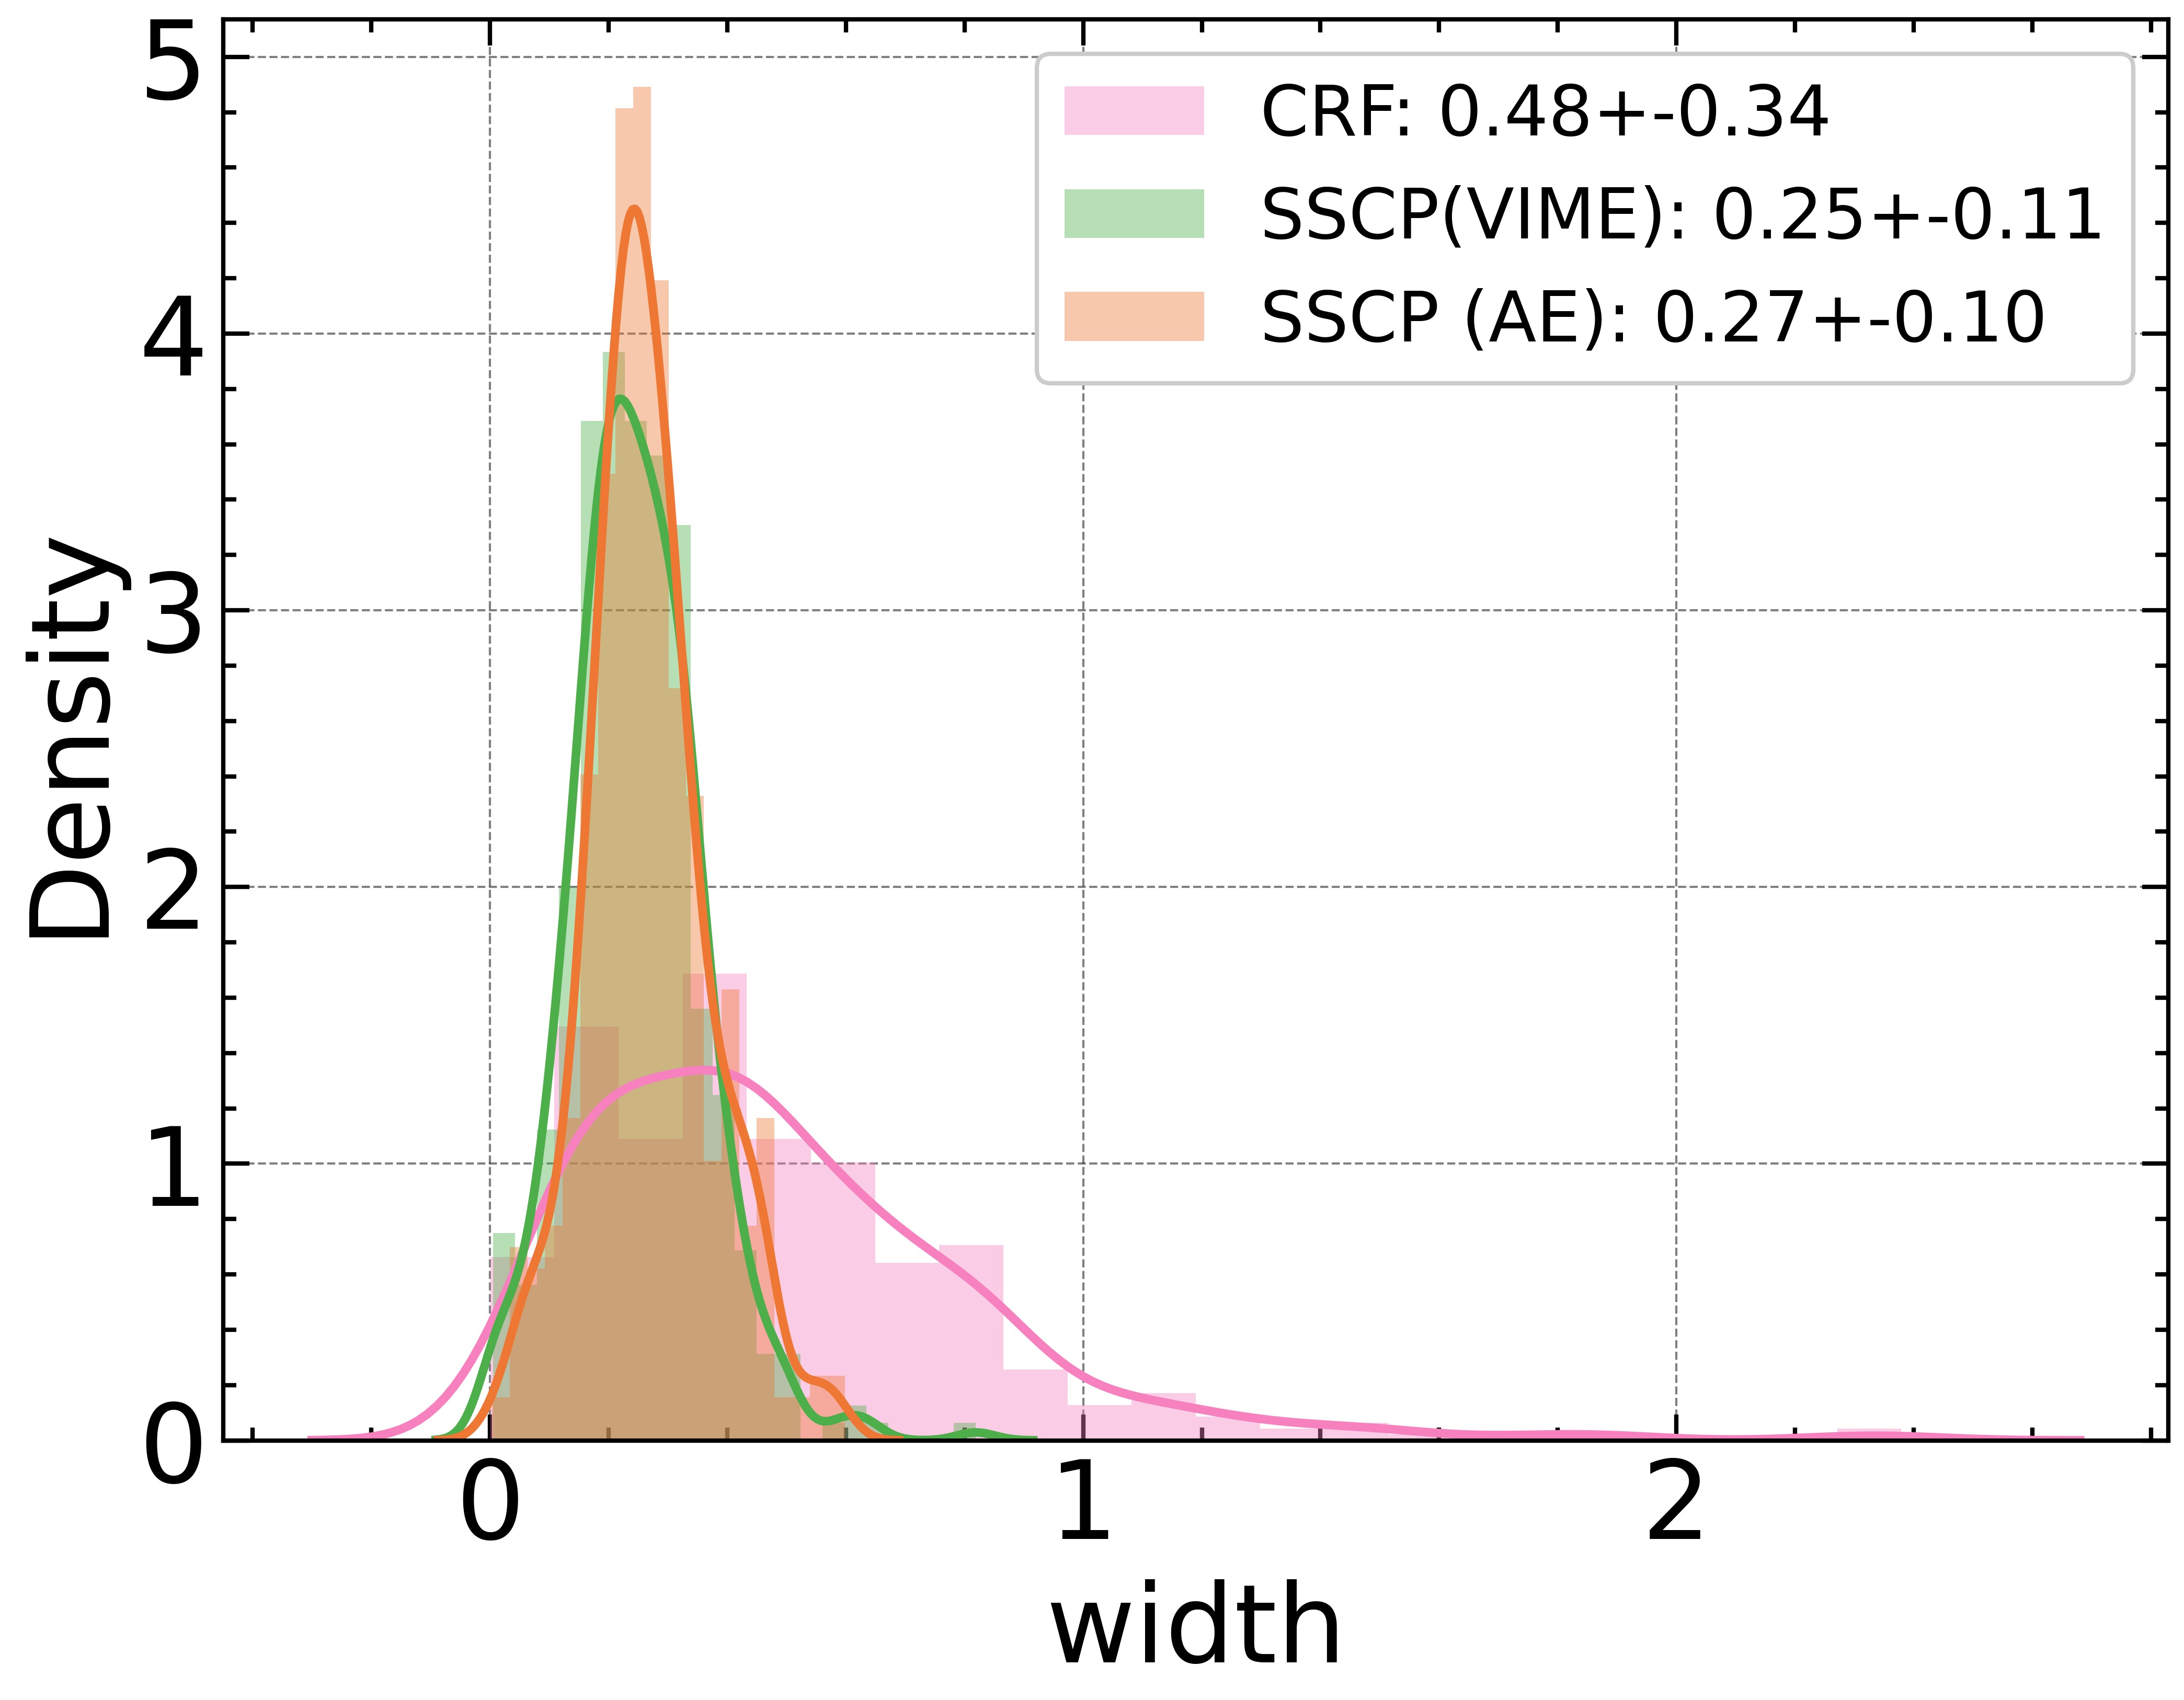

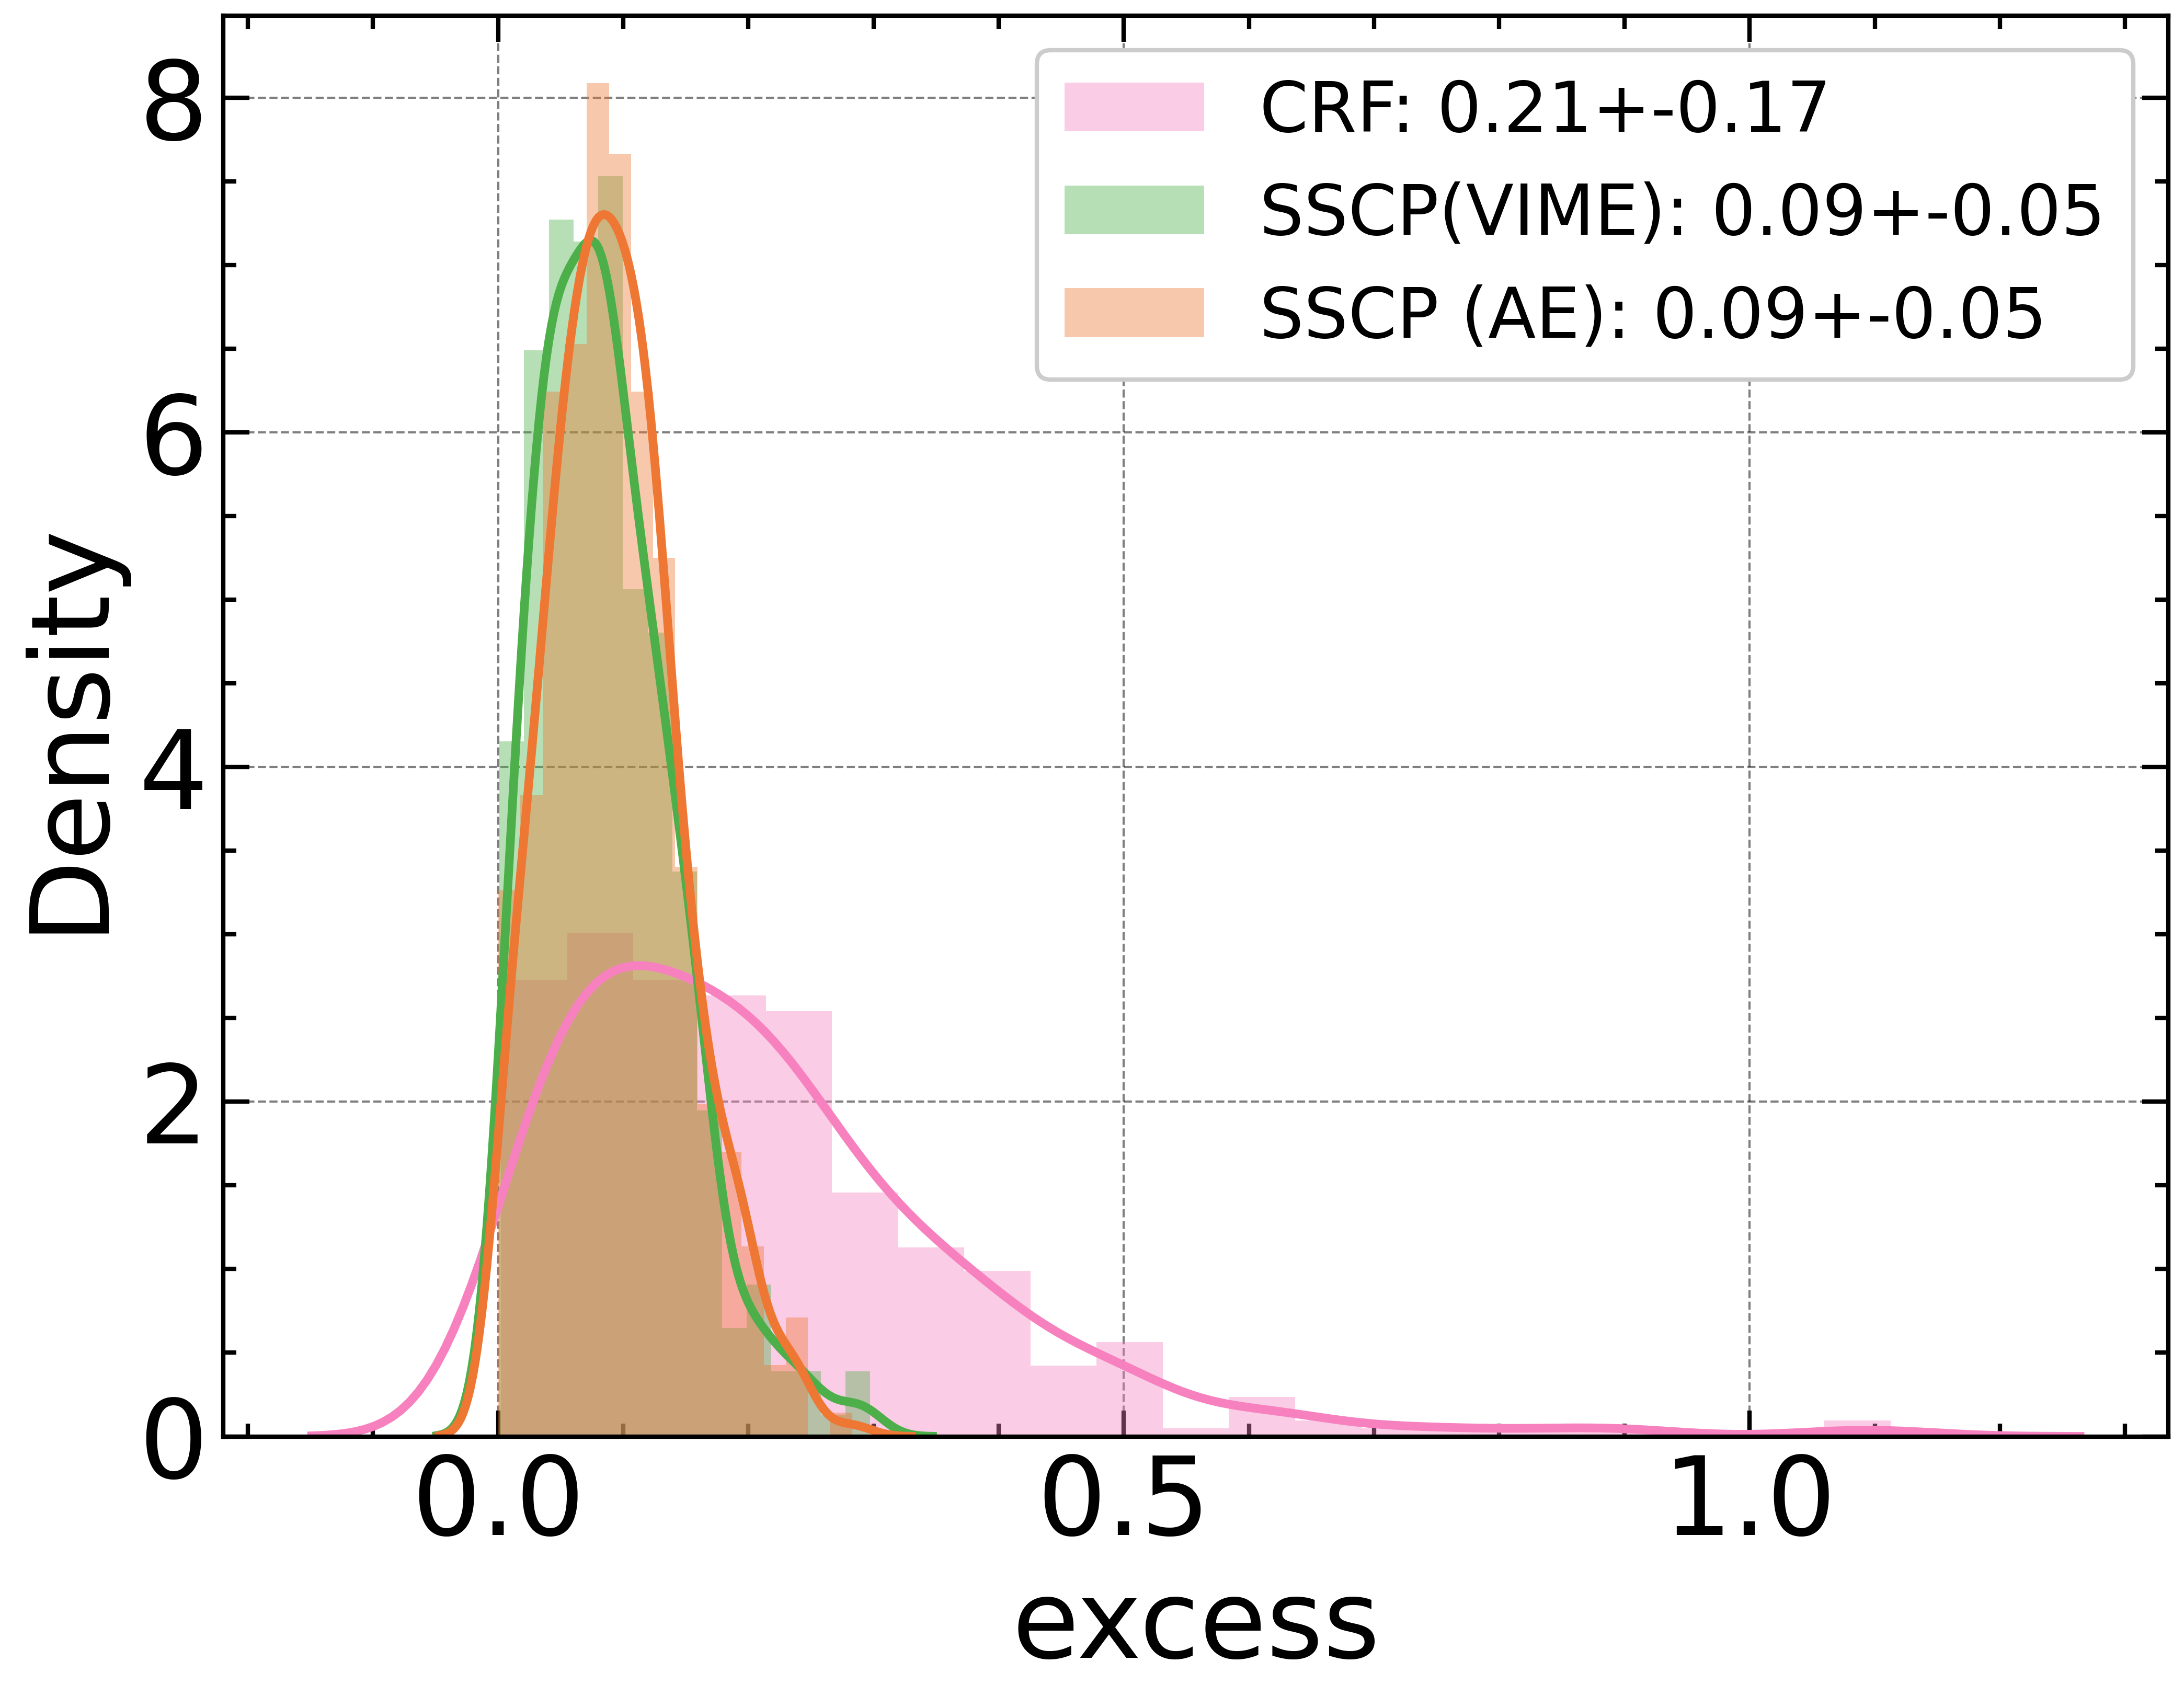

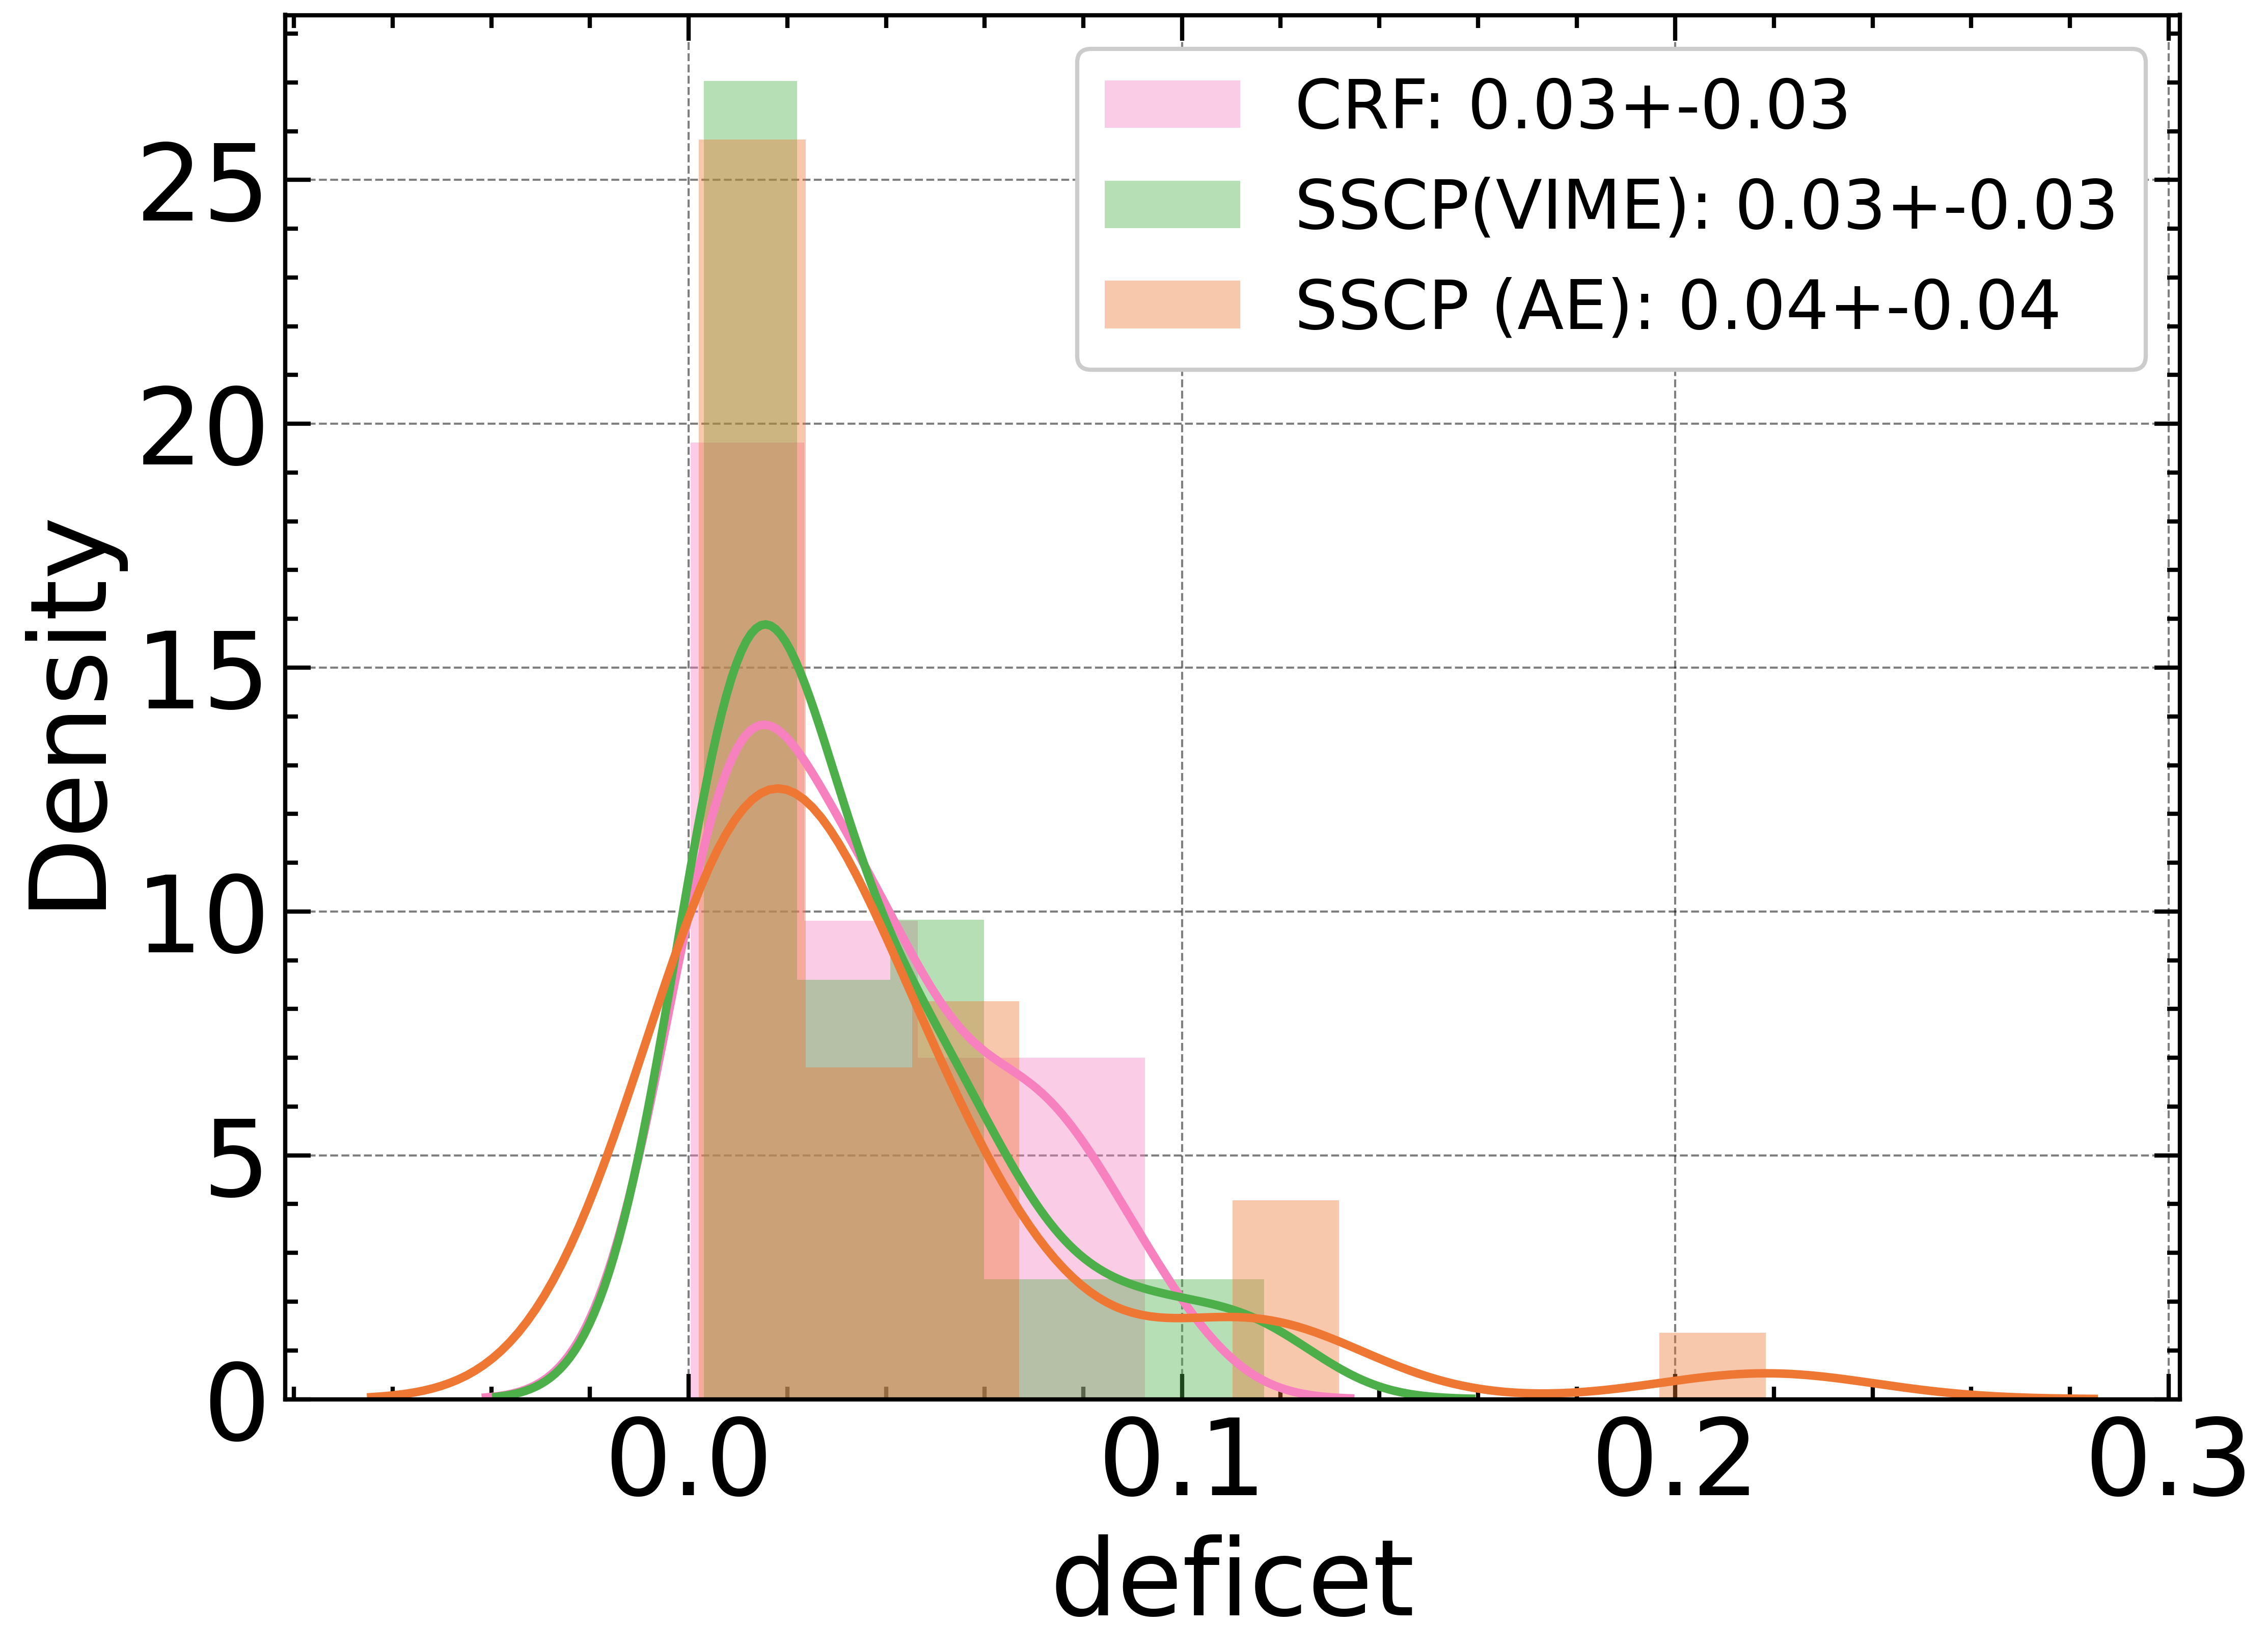

In [21]:
plot_distributions(metric='width')
plot_distributions(metric='excess')
plot_distributions(metric='deficet')

In [22]:
print(f"Corr VIME to error = {np.corrcoef((ypred_test - y_test_sc).reshape(-1), ssl_test_vime.reshape(-1))[0,1]}")
print(f"Corr AE to error = {np.corrcoef((ypred_test - y_test_sc).reshape(-1), ssl_test_ae.reshape(-1))[0,1]}")

Corr VIME to error = 0.3287865805634039
Corr AE to error = 0.055615663928225714
